In [2]:
import autograd.numpy as np
from mlrefined_libraries import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2d examples


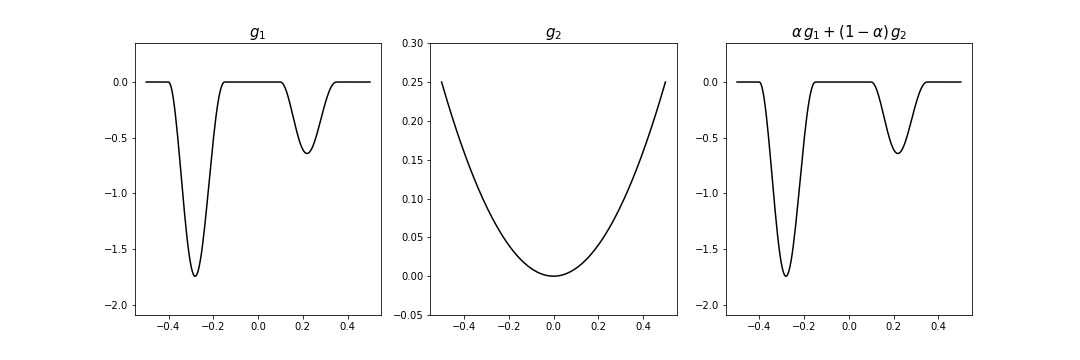
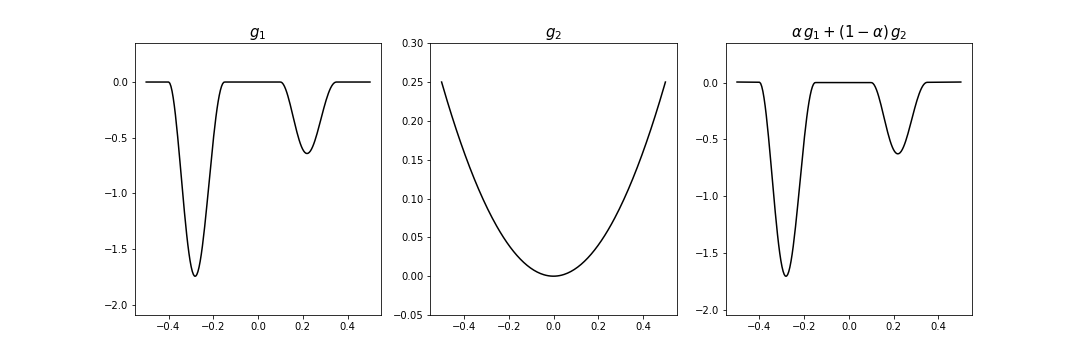
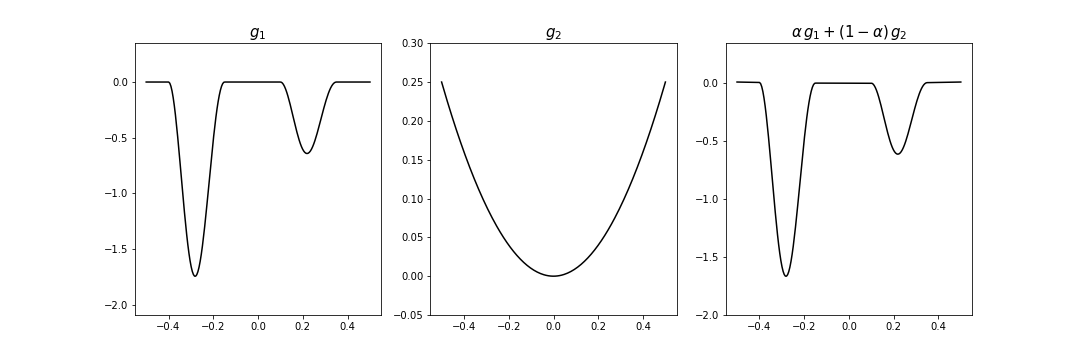
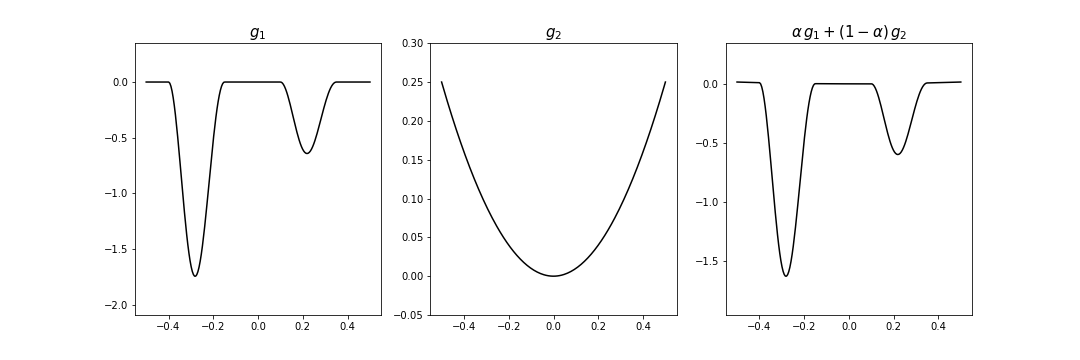
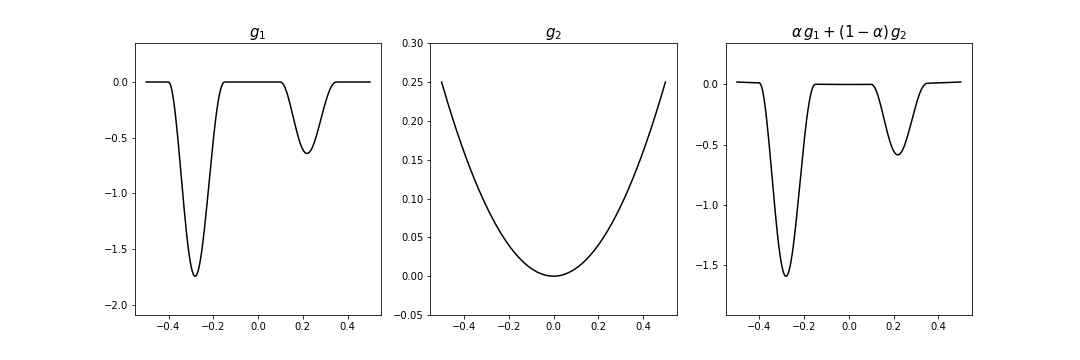
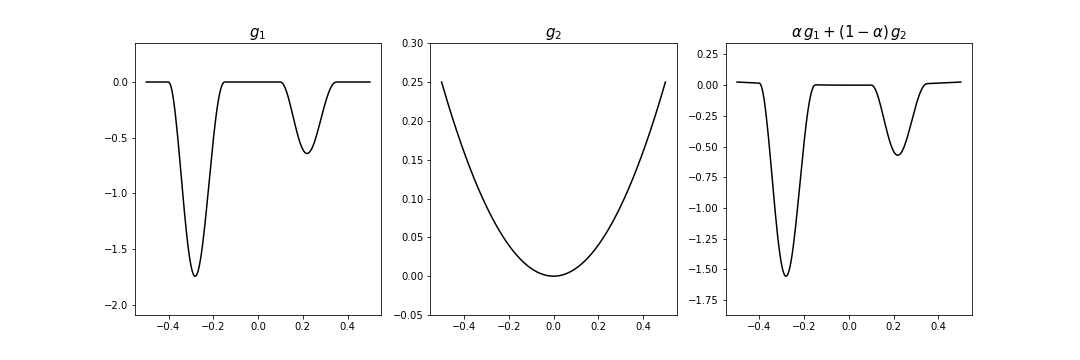
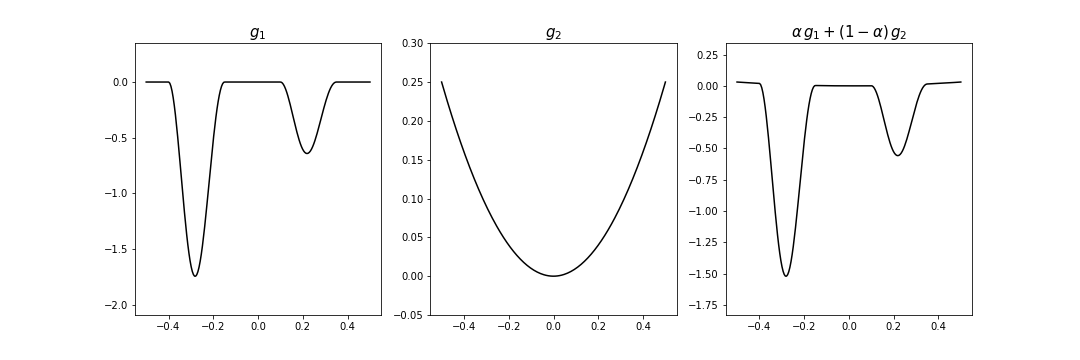
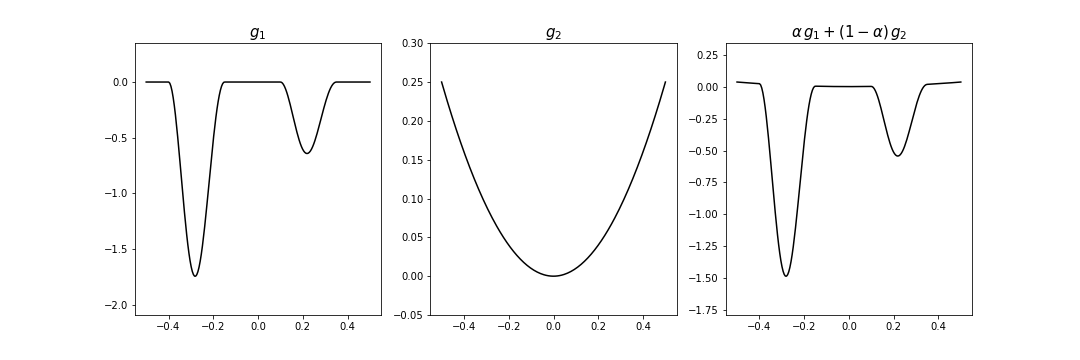
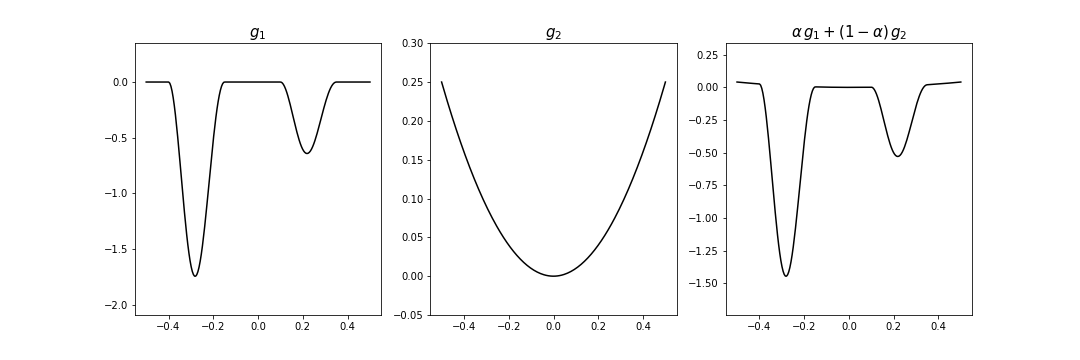
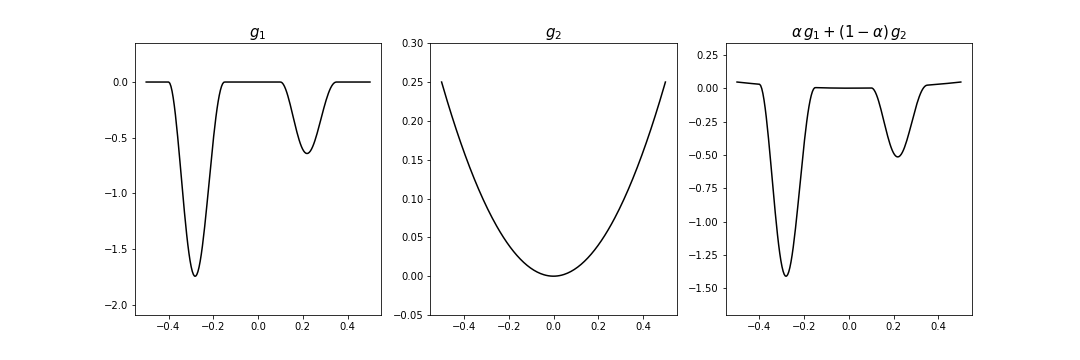
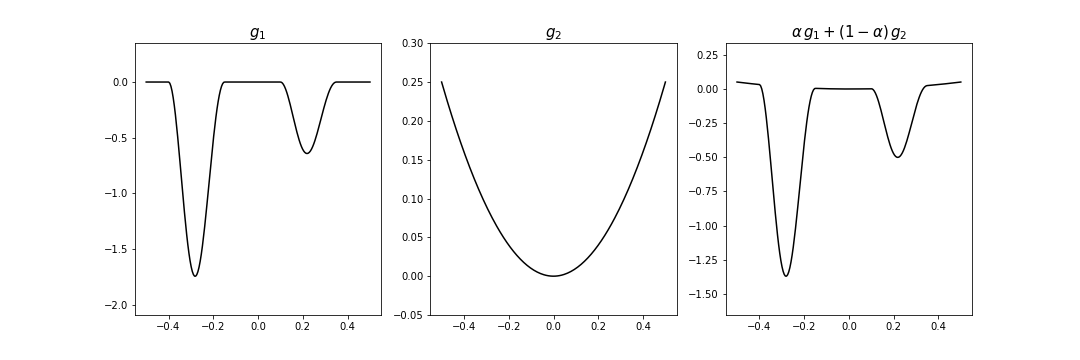
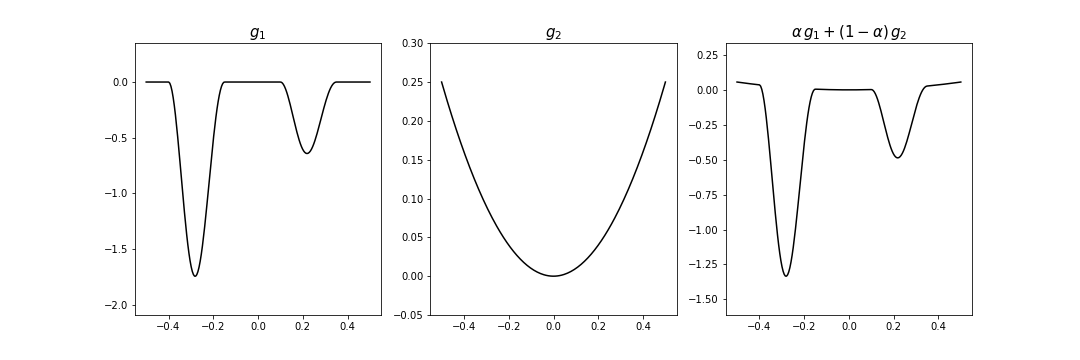
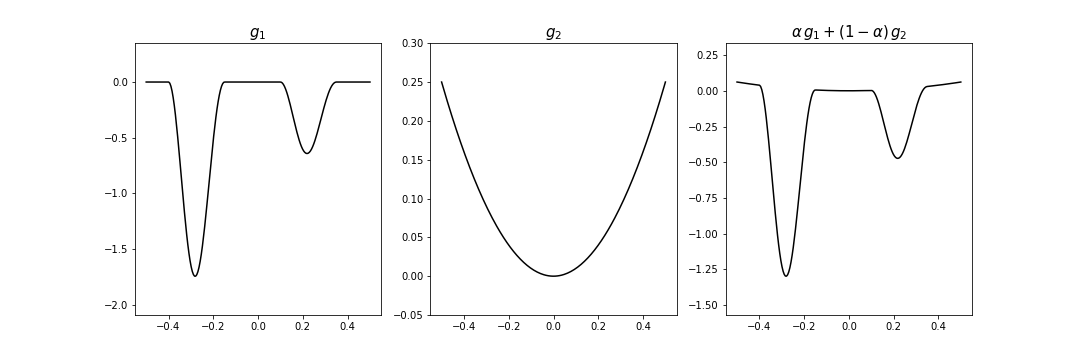
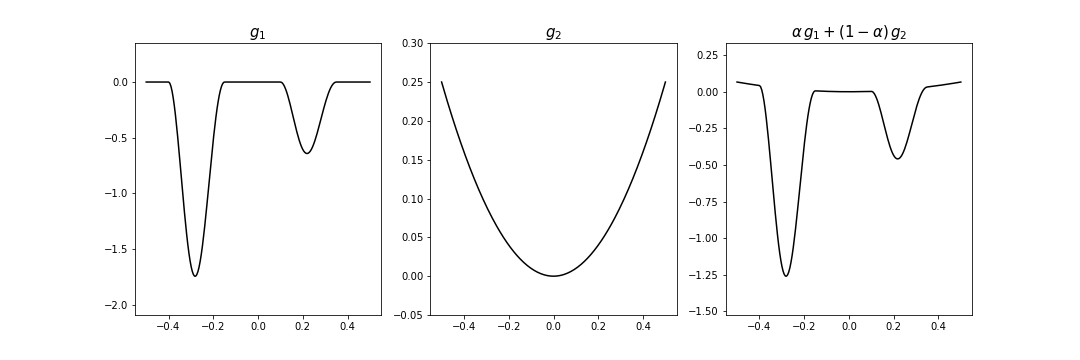
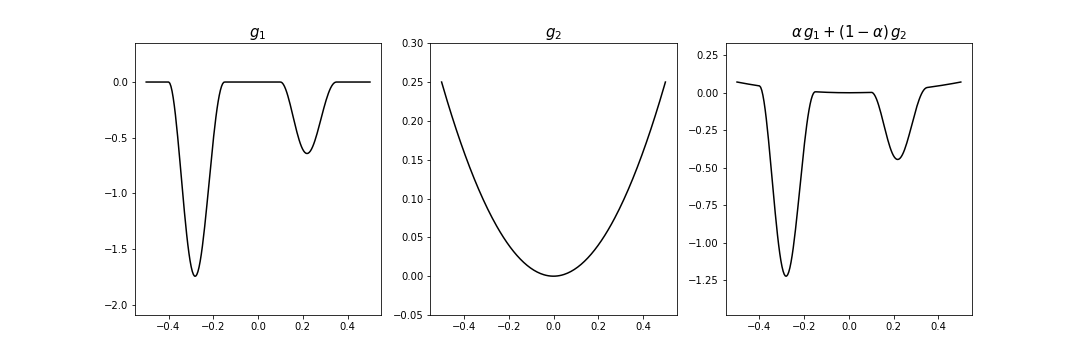
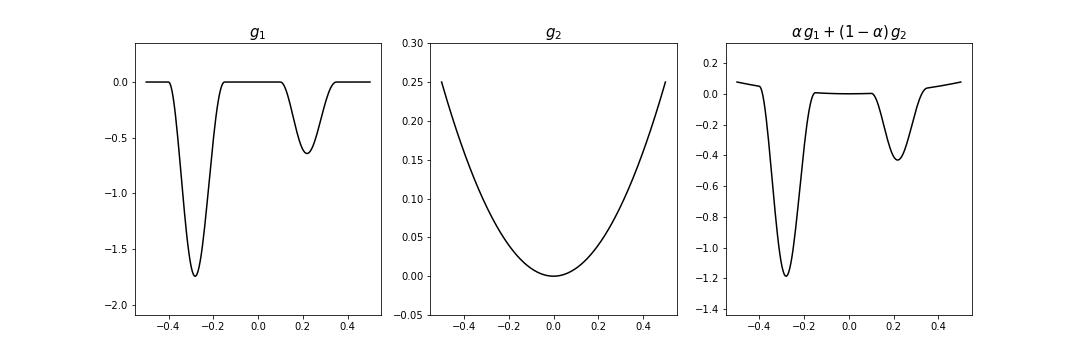
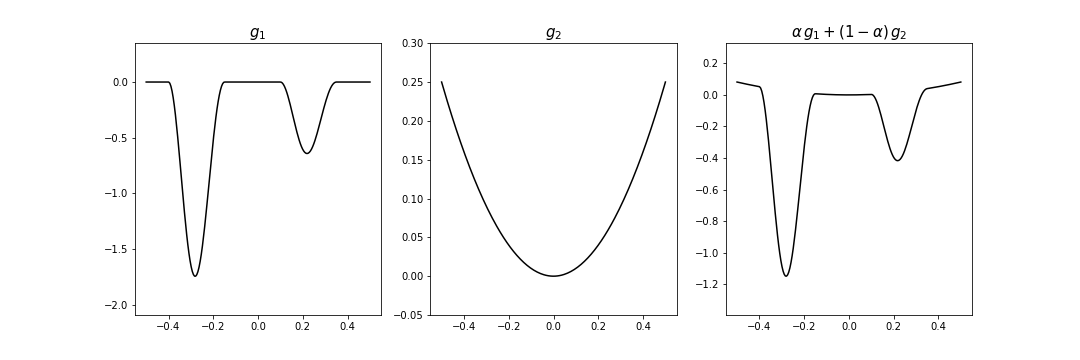
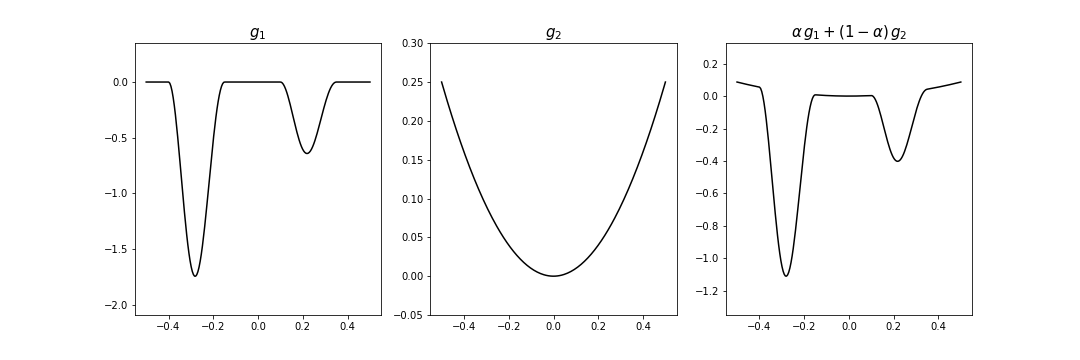
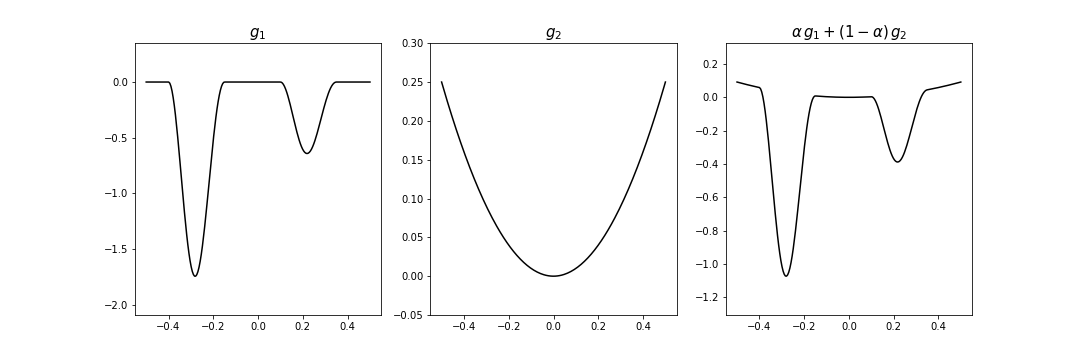
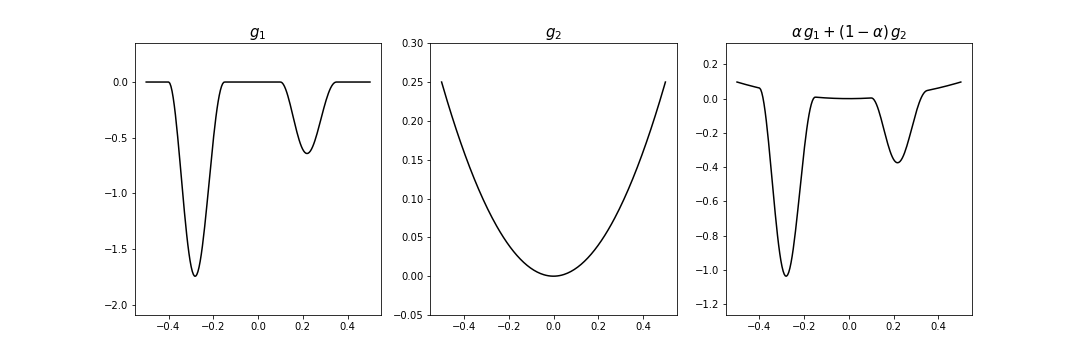
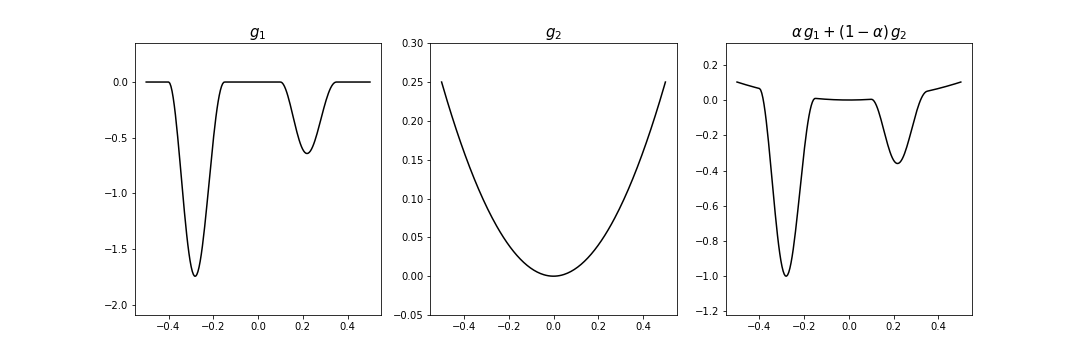
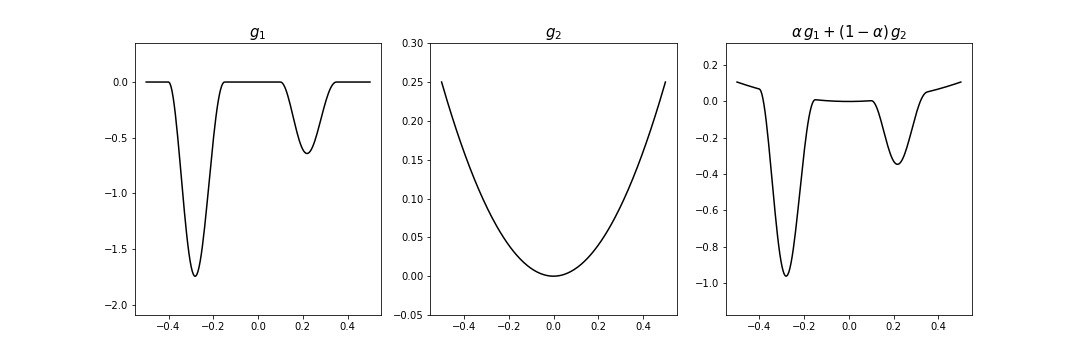
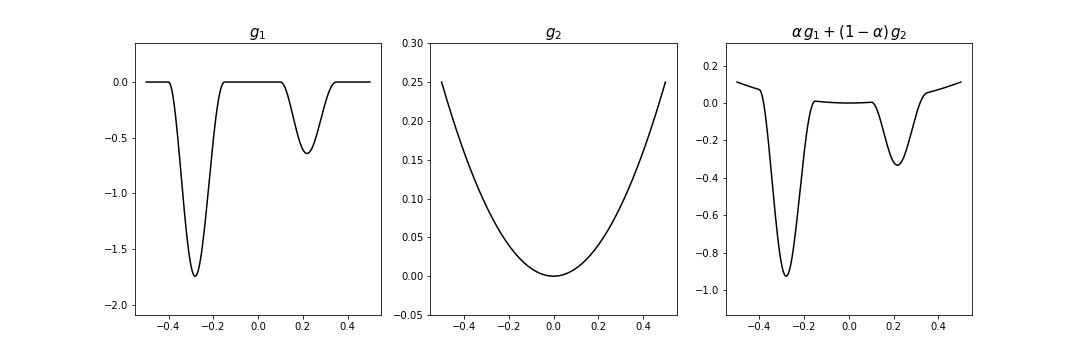
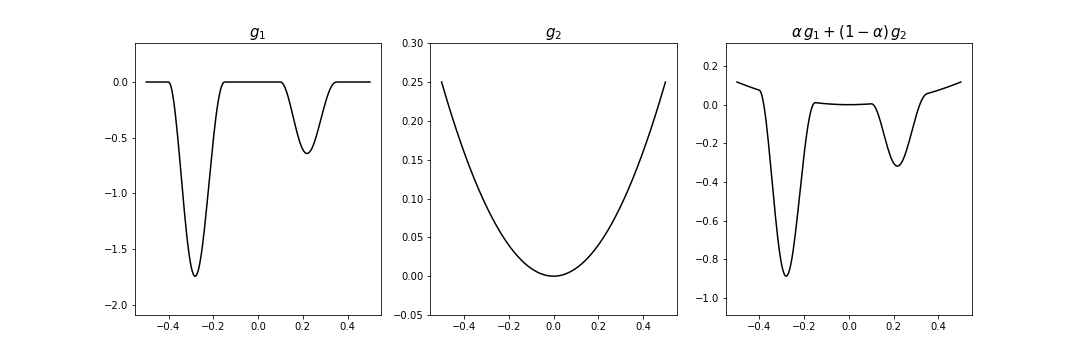
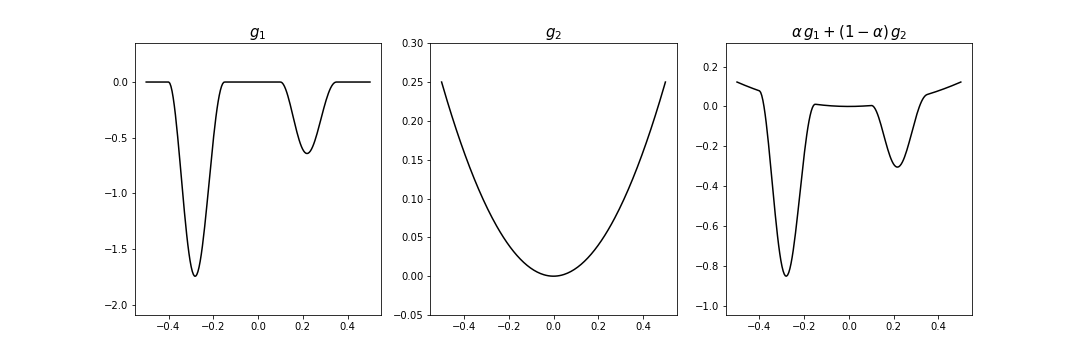
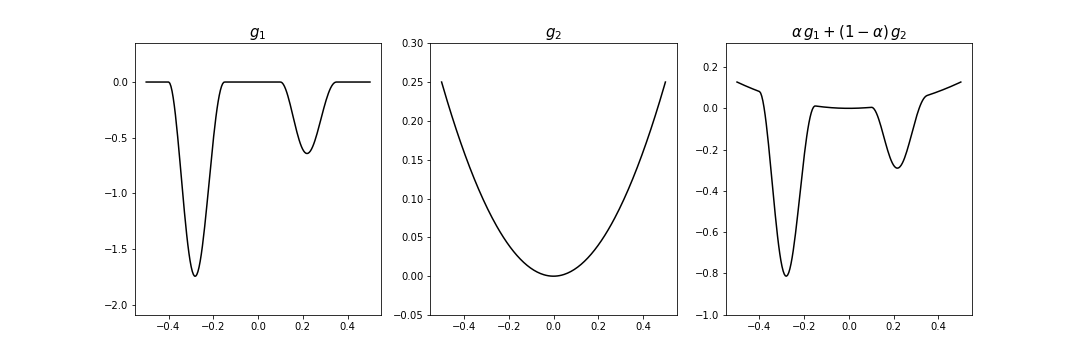
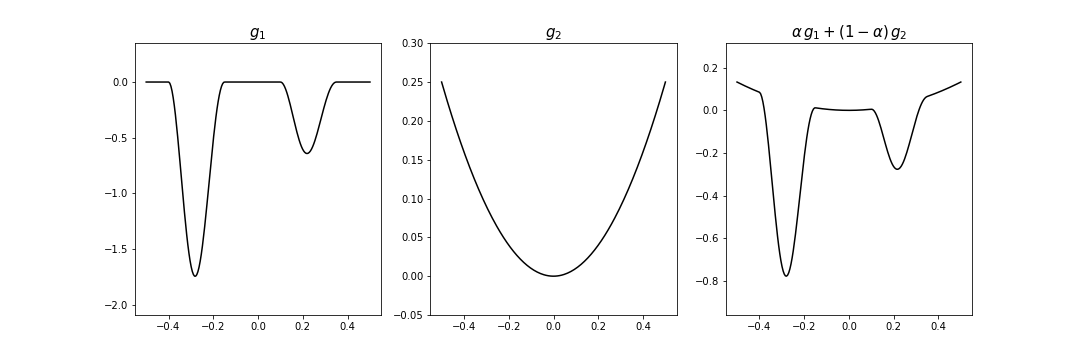
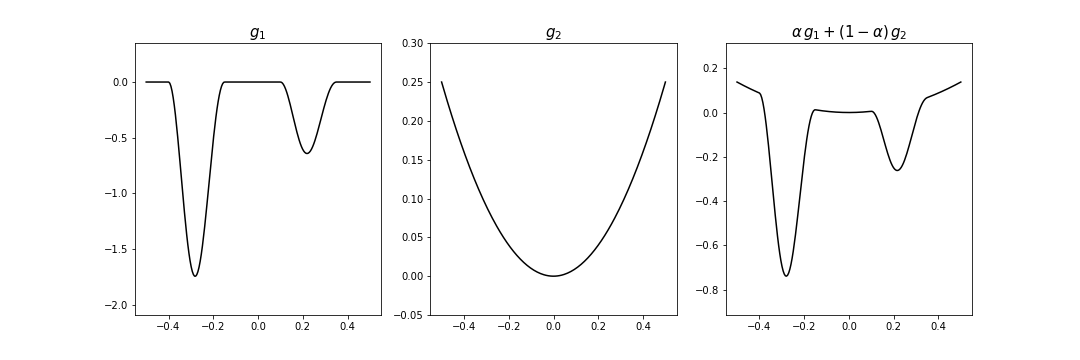
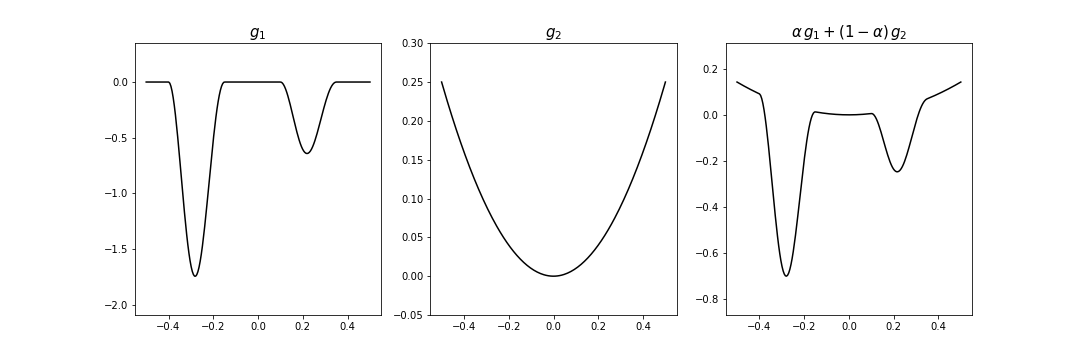
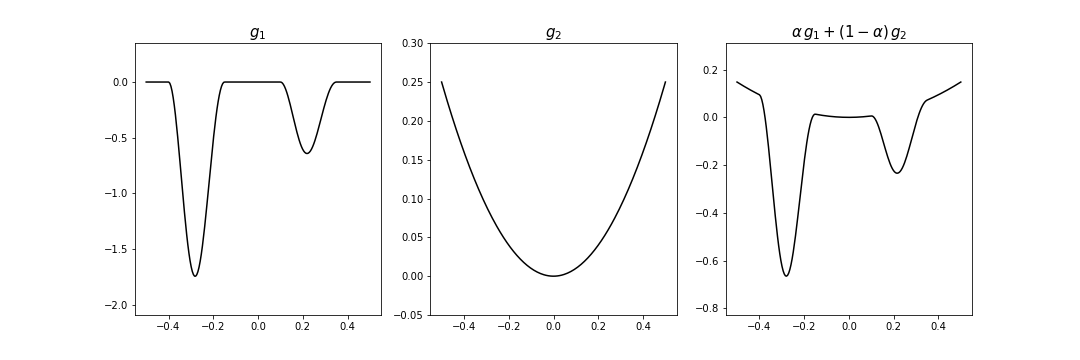
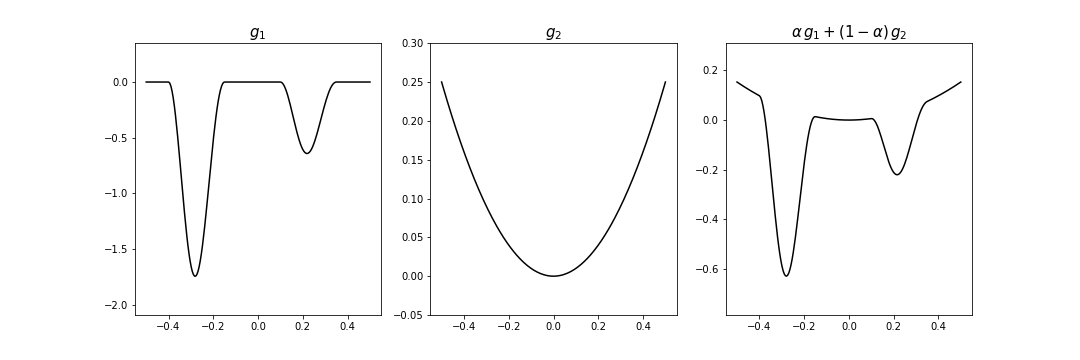
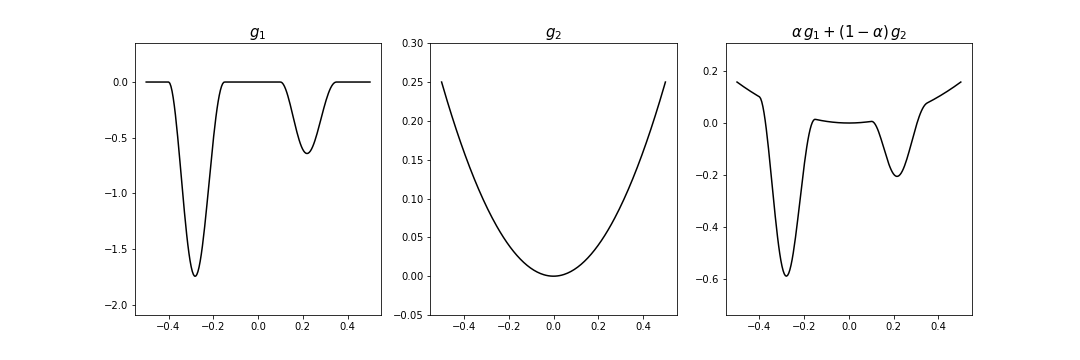
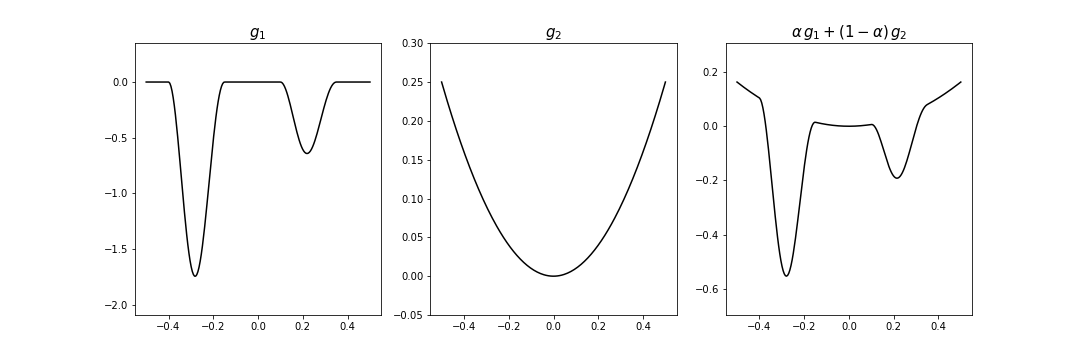
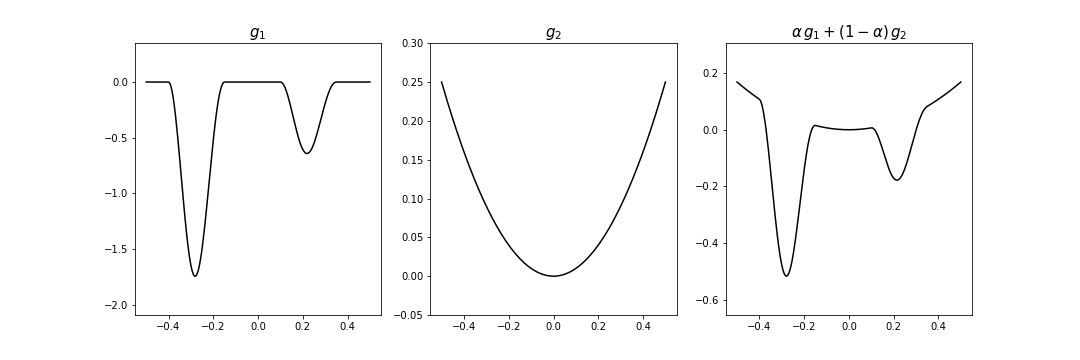
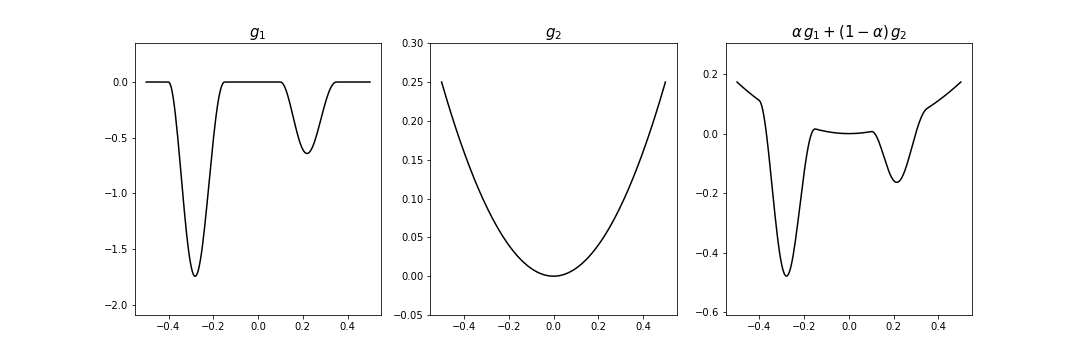
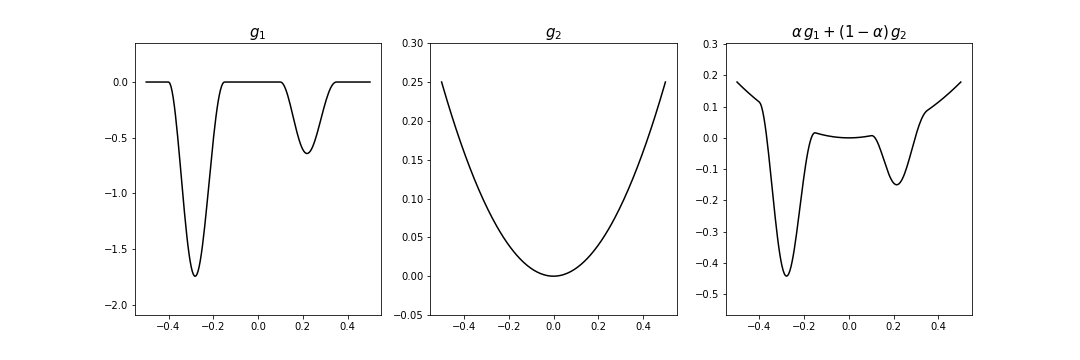
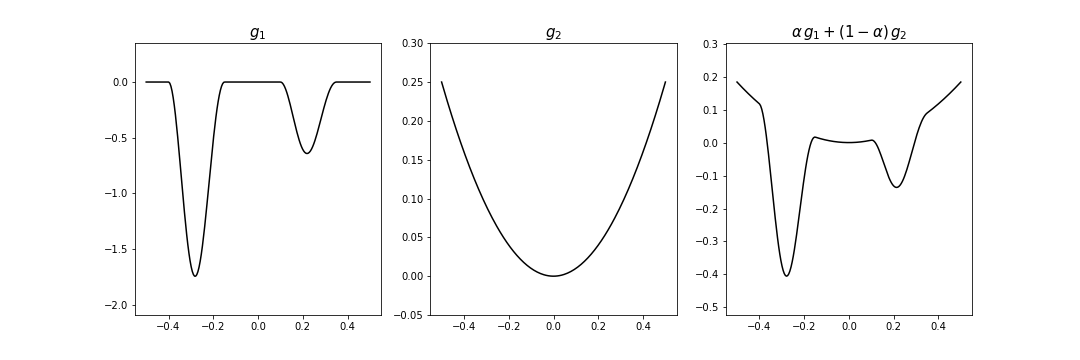
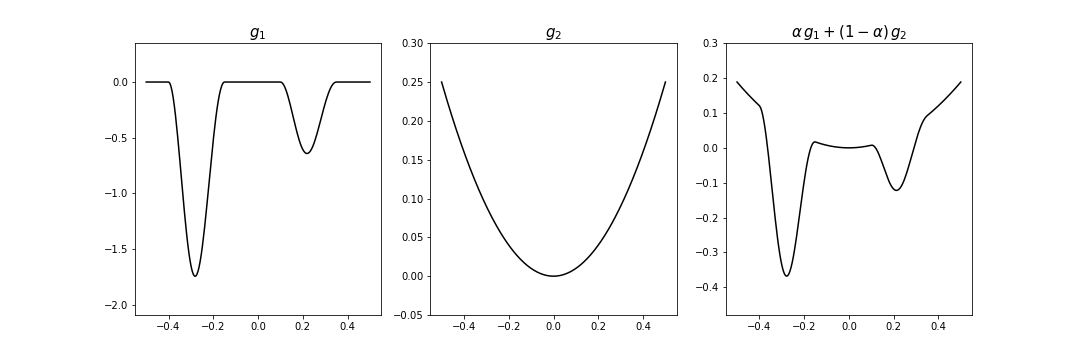
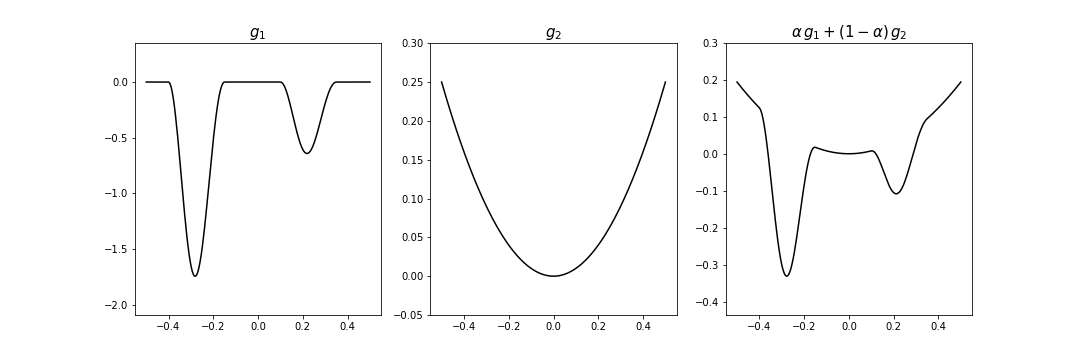
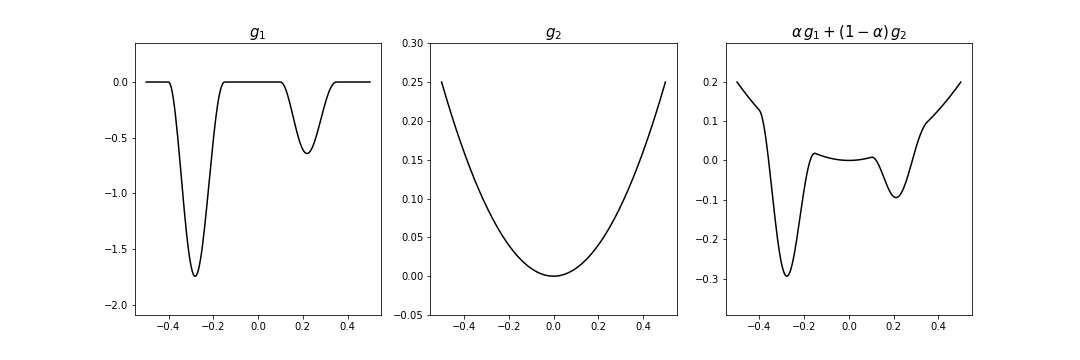
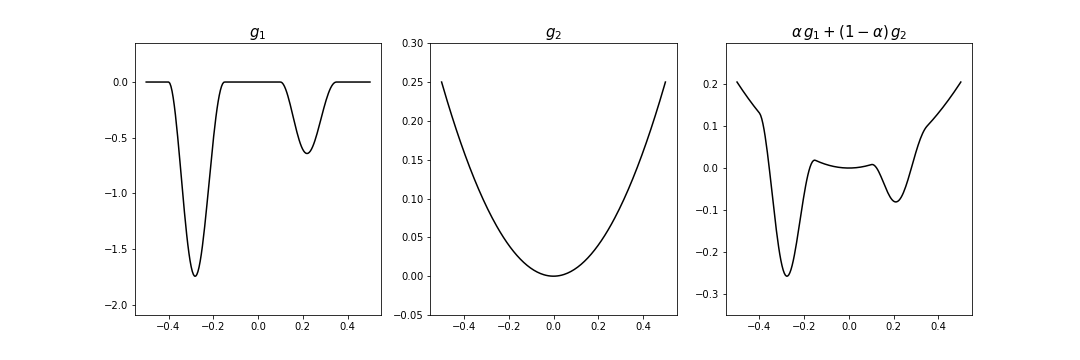
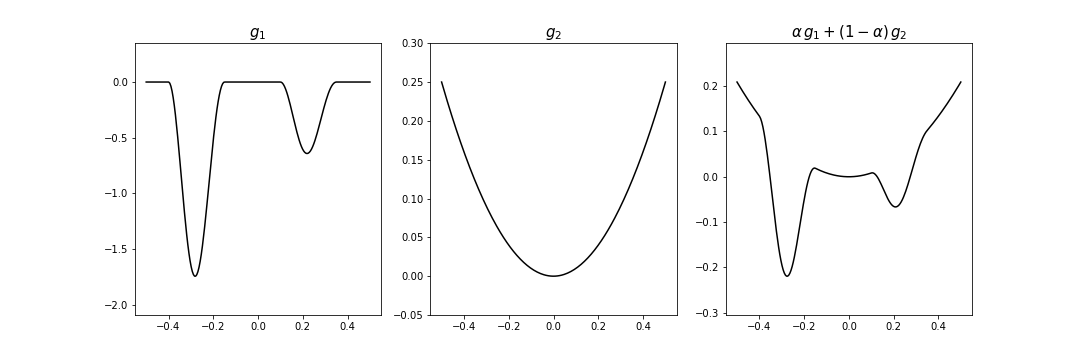
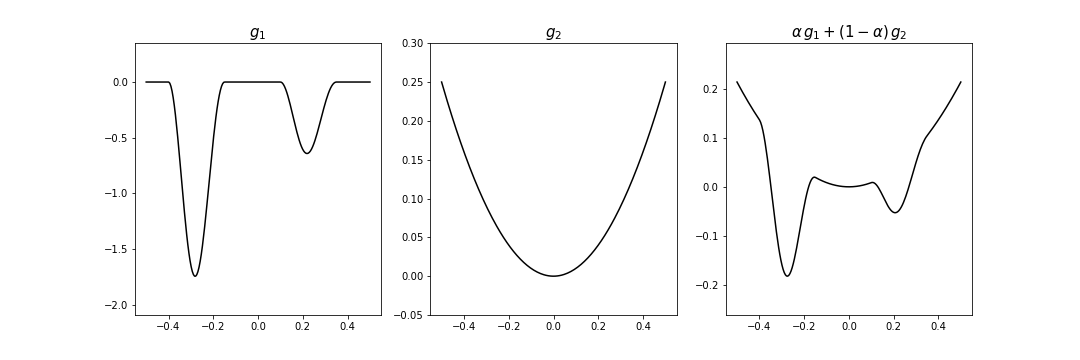
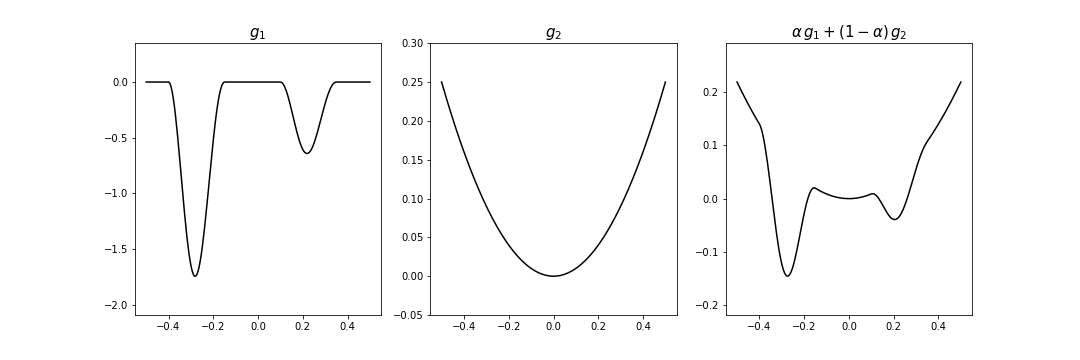
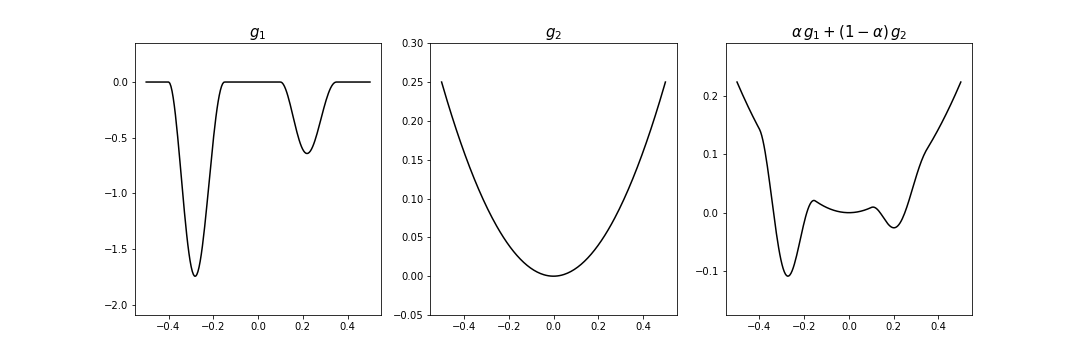
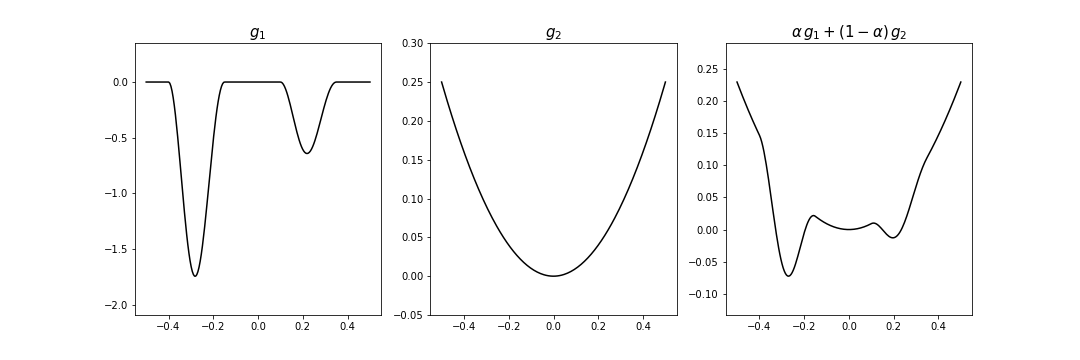
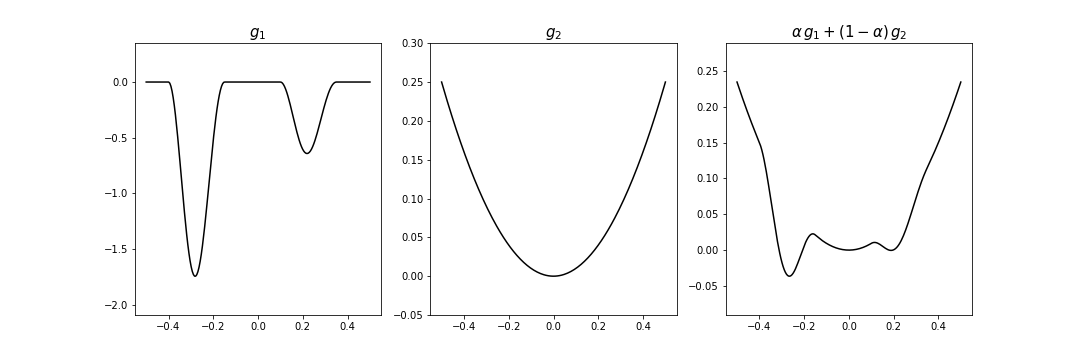
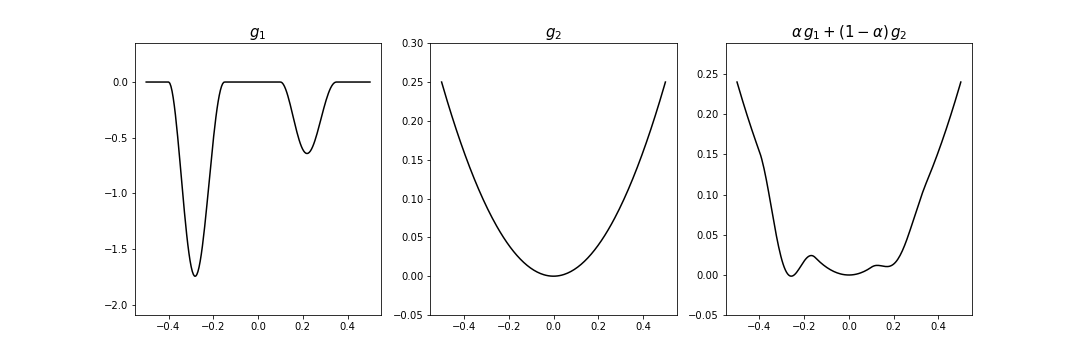
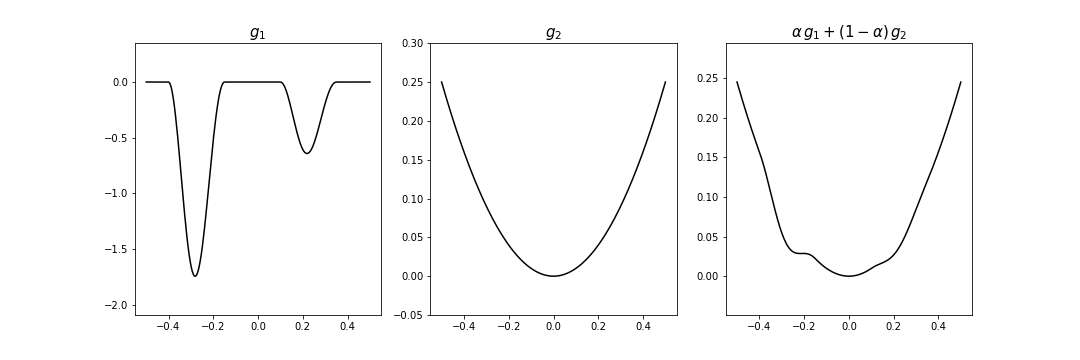
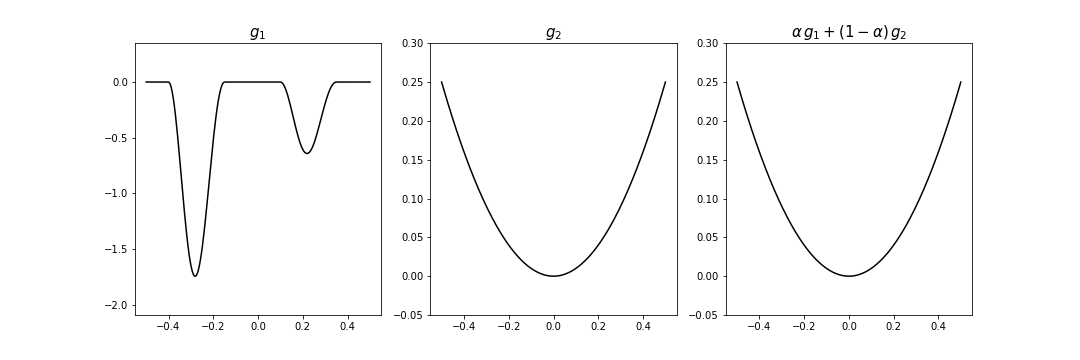

In [3]:
# what function should we play with?  Defined in the next line.
g1 = lambda w: -np.maximum(0,np.exp(-w)*np.sin(4*np.pi*(w - 0.1)))**2
g2 = lambda w: w**2

# create an instance of the visualizer with this function
test = math_functions_basics_library.convex_function_addition_2d.visualizer()

# plot away
test.draw_it(g1 = g1,g2 = g2,num_slides = 50,min_range = -0.5,max_range = 0.5)


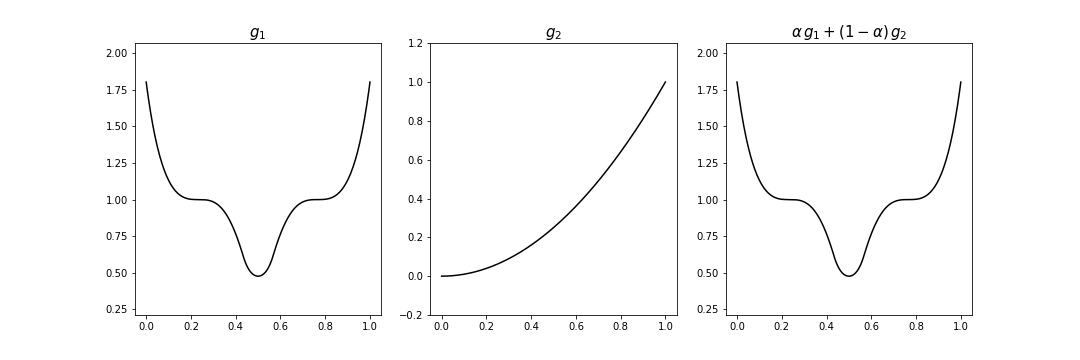
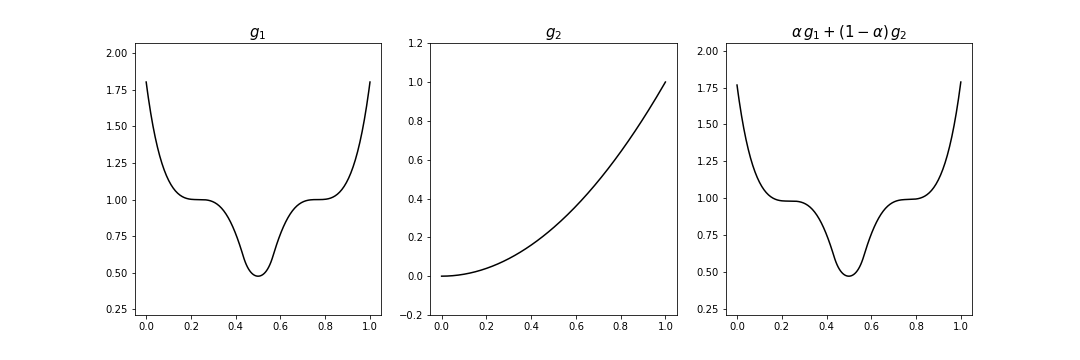
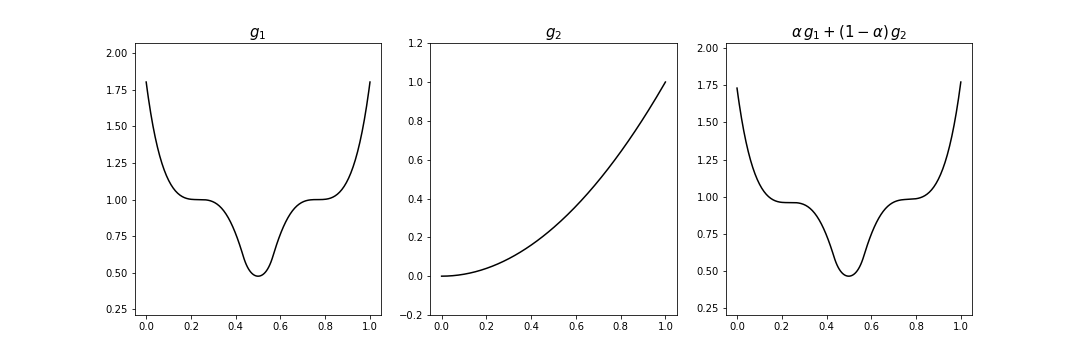
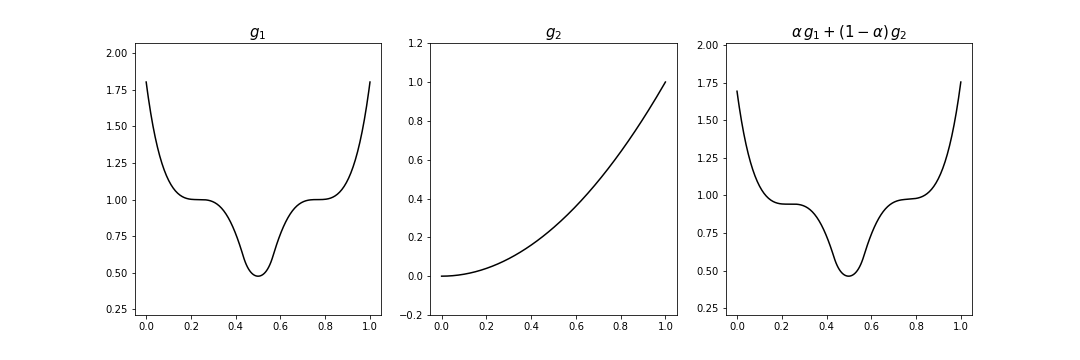
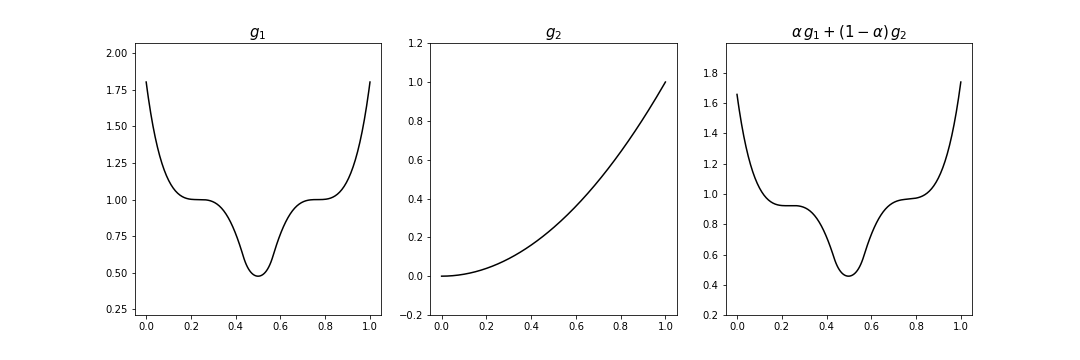
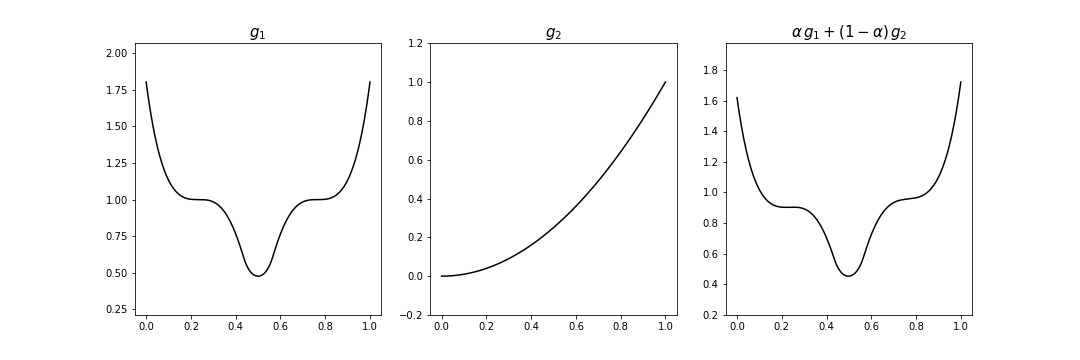
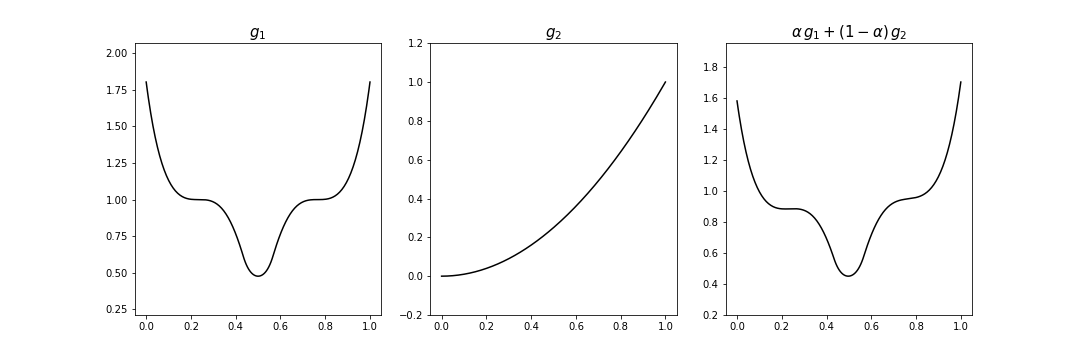
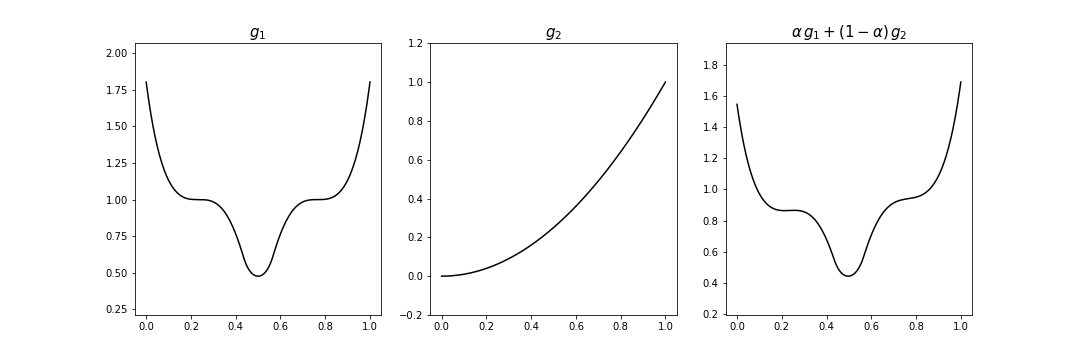
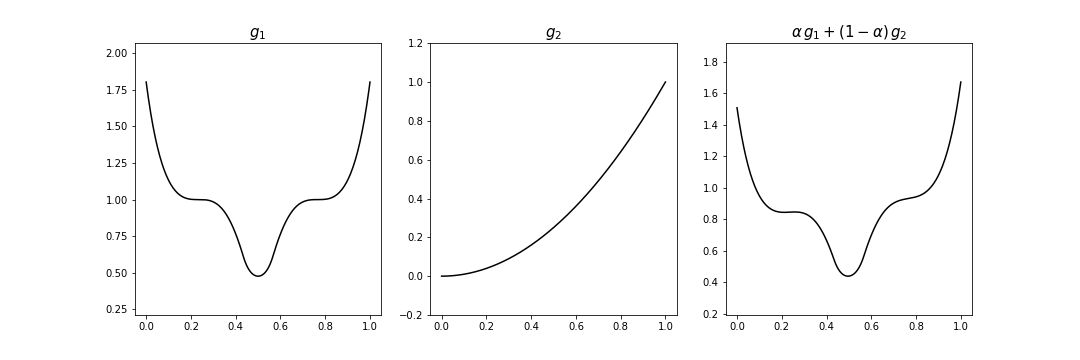
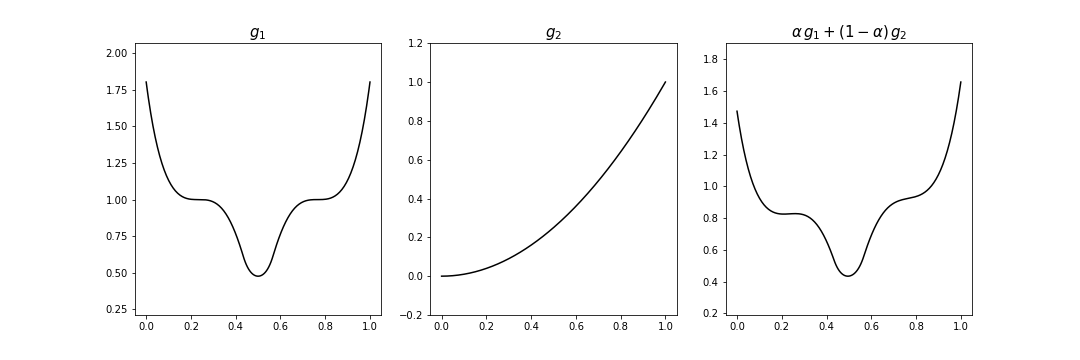
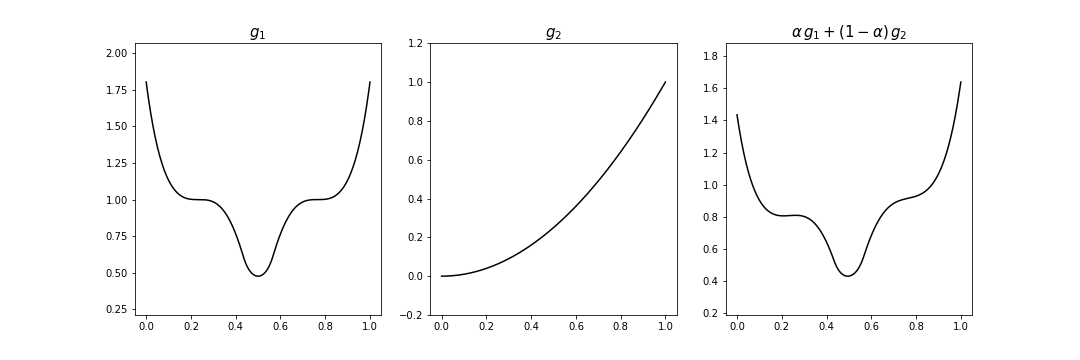
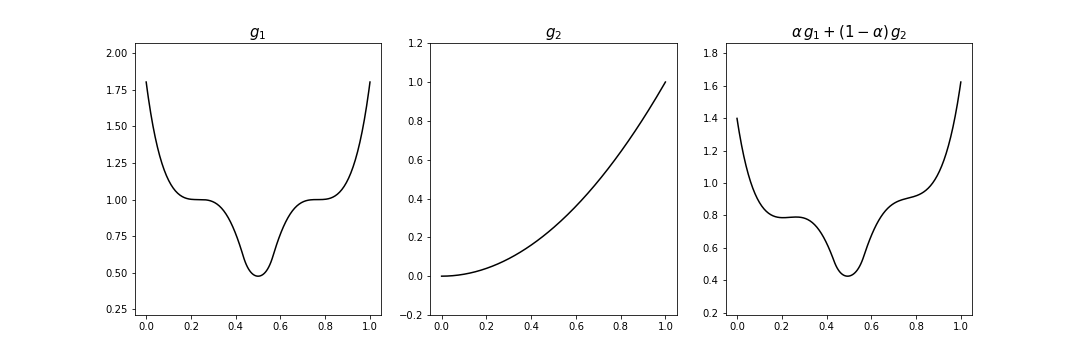
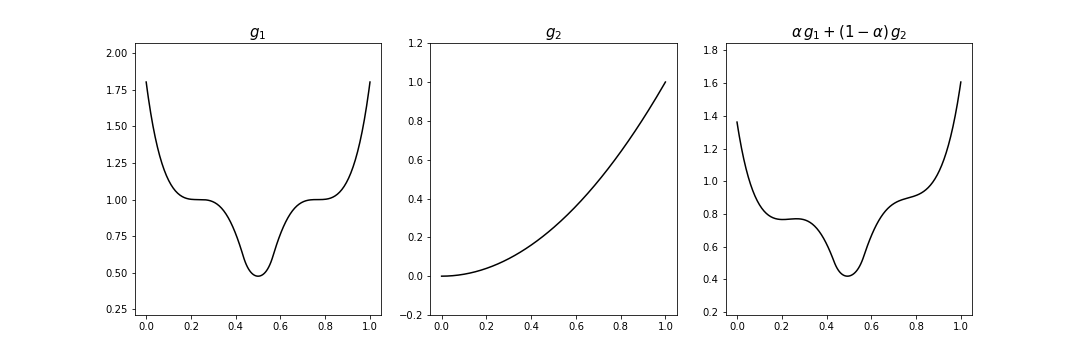
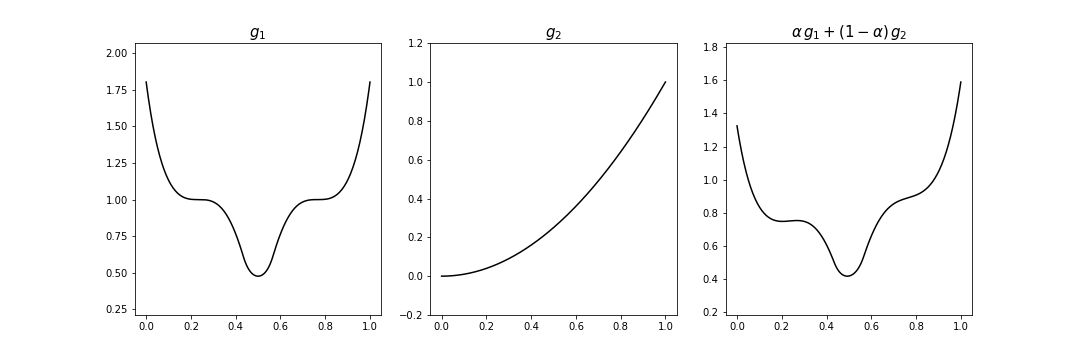
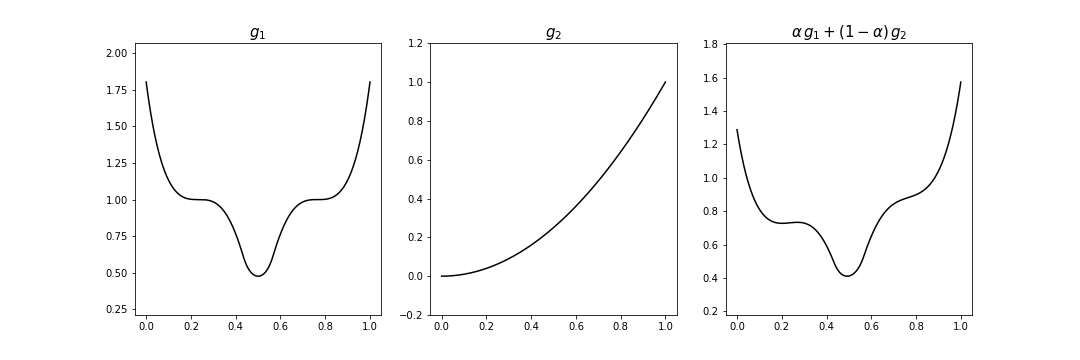
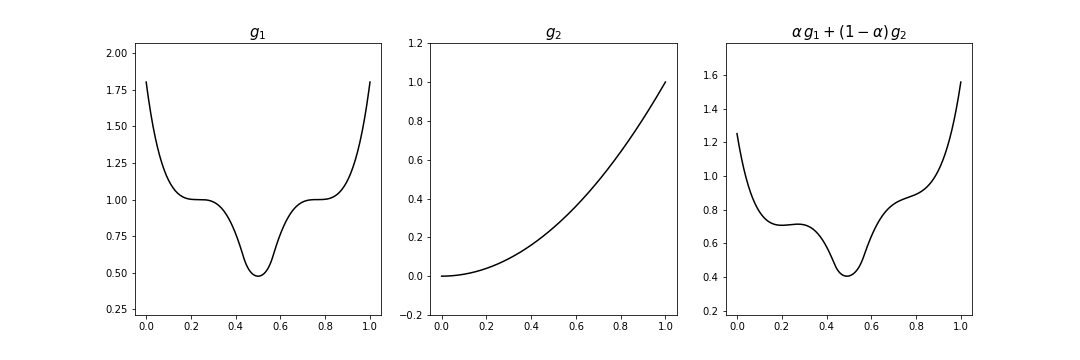
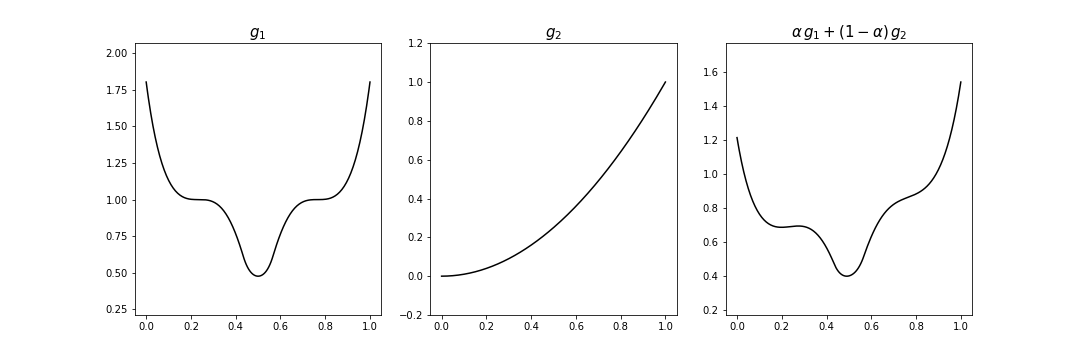
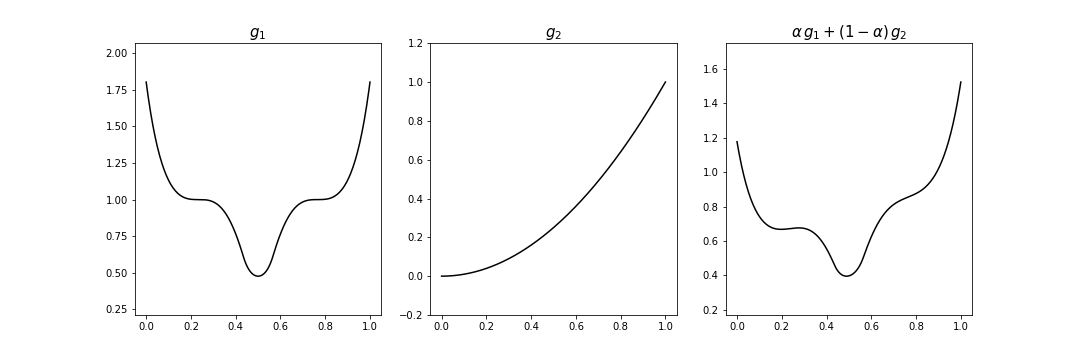
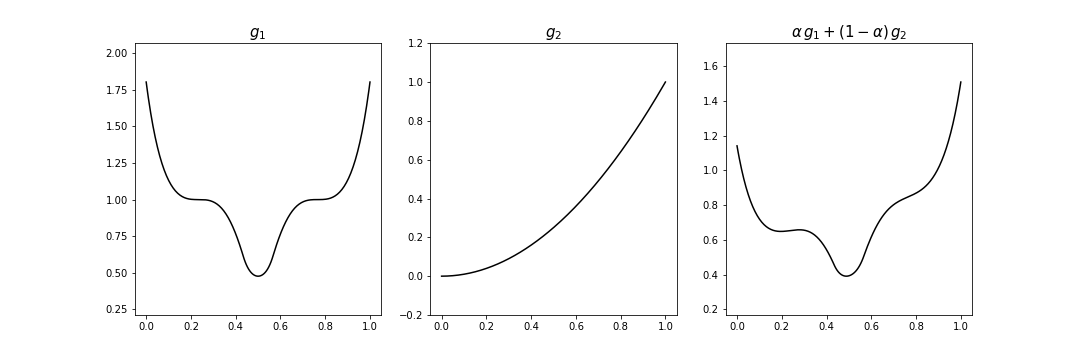
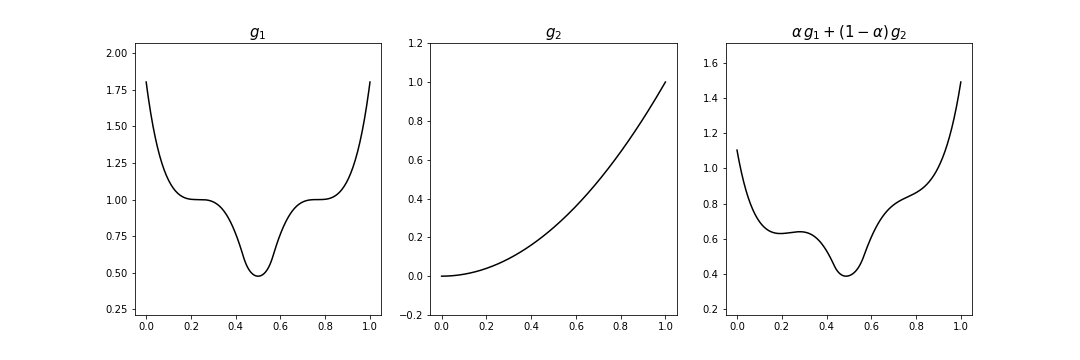
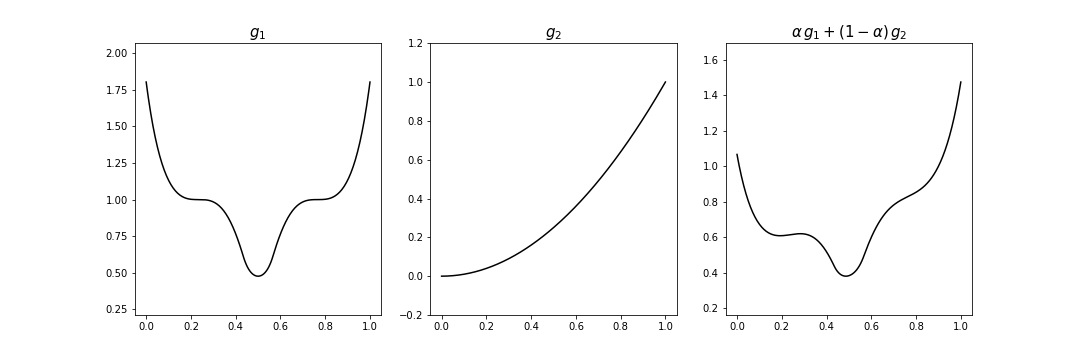
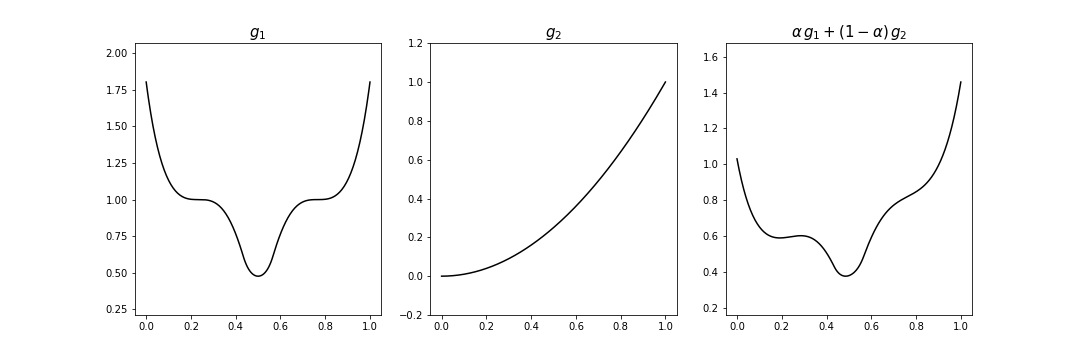
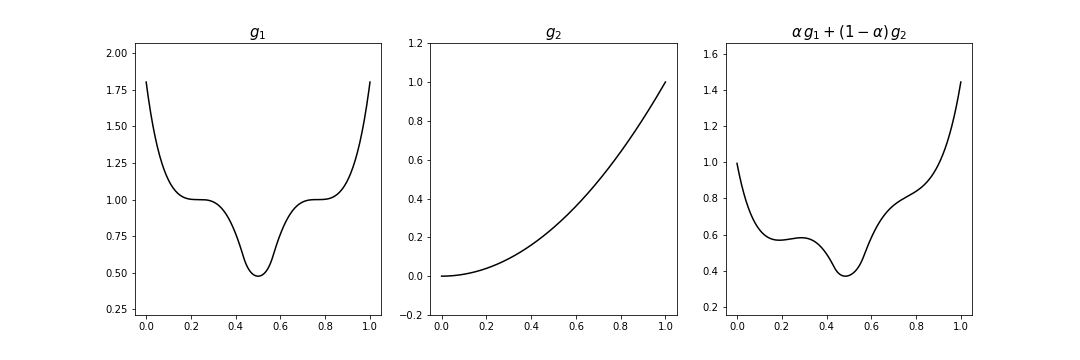
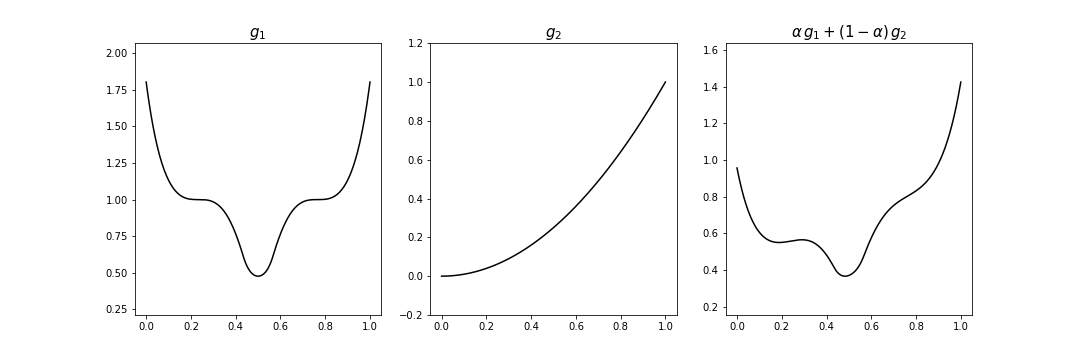
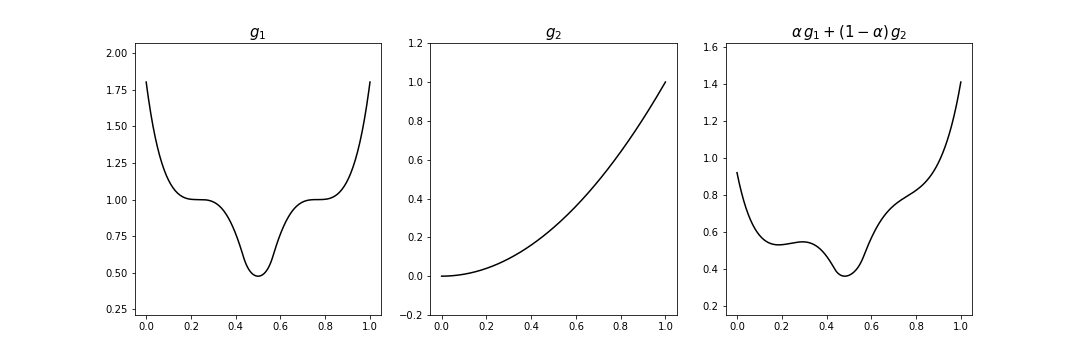
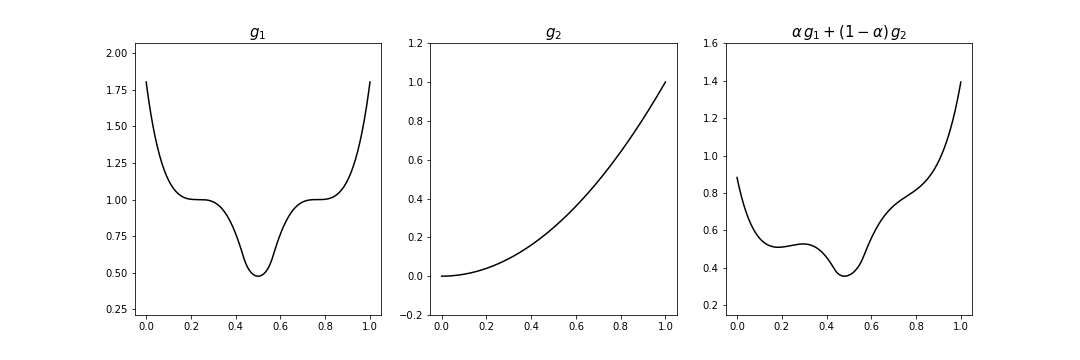
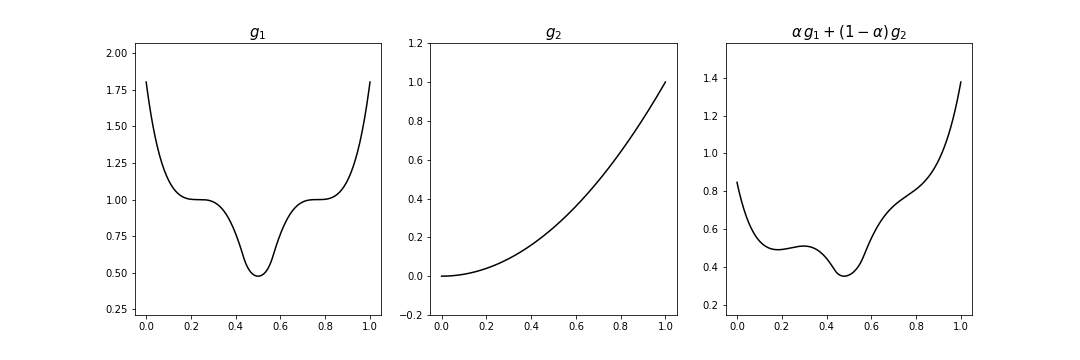
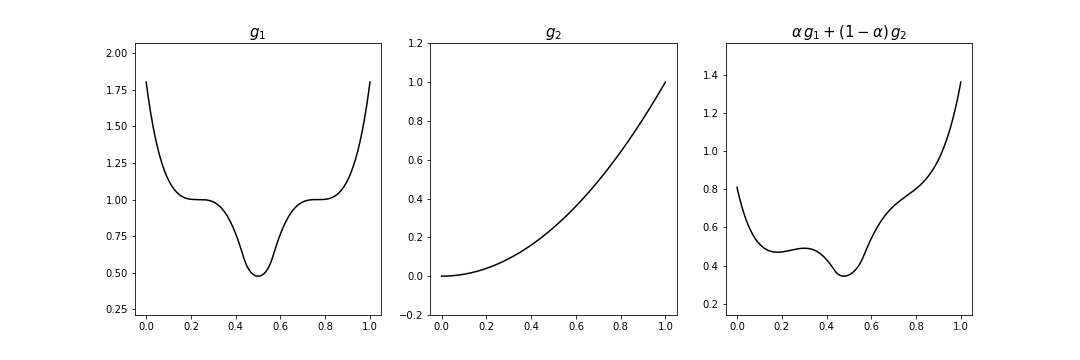
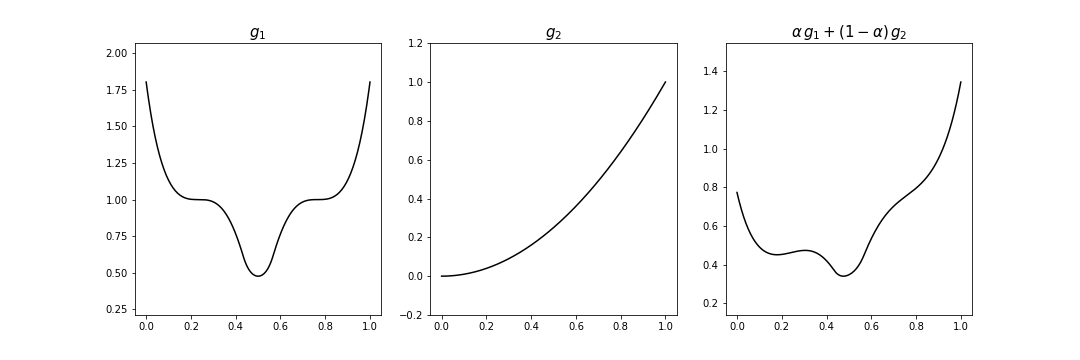
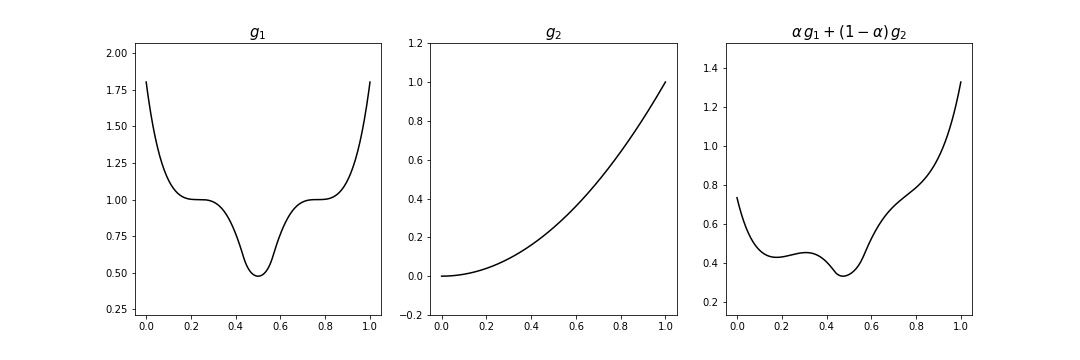
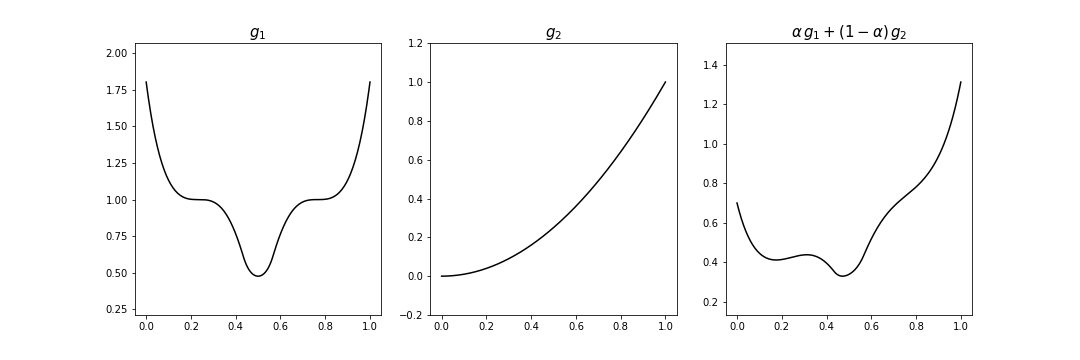
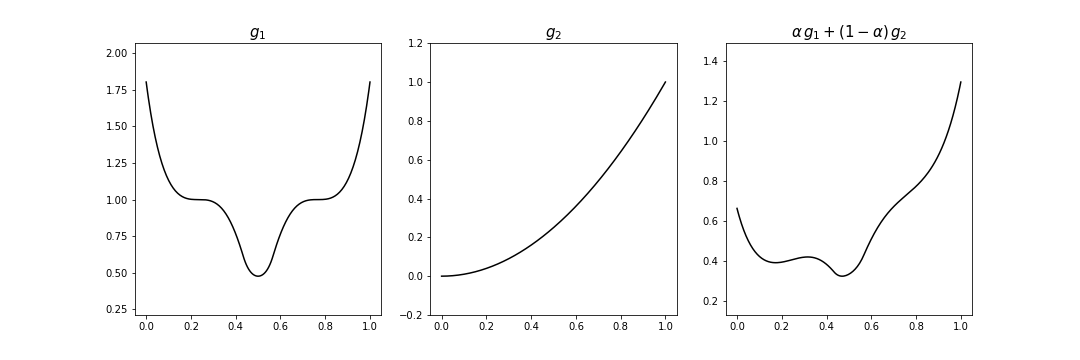
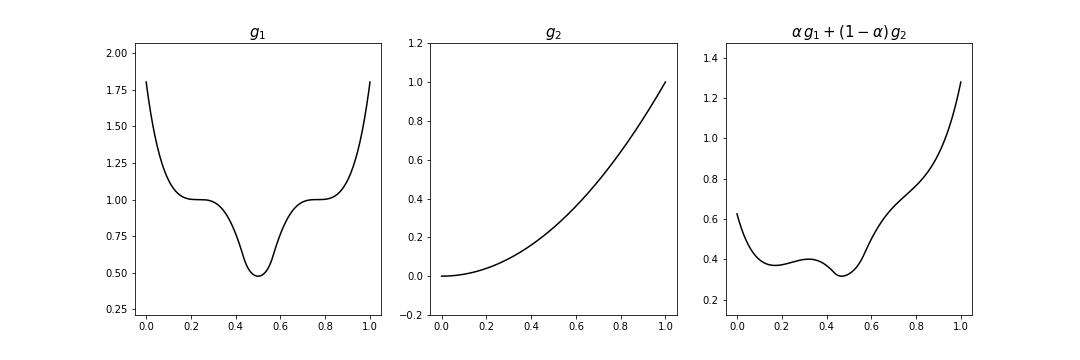
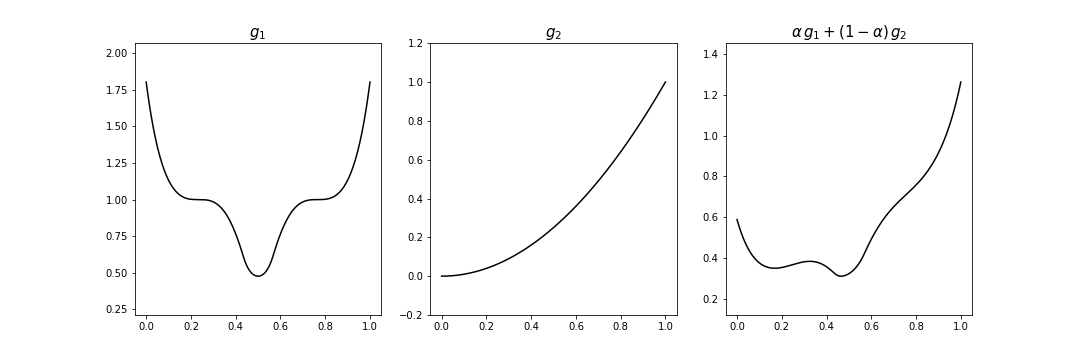
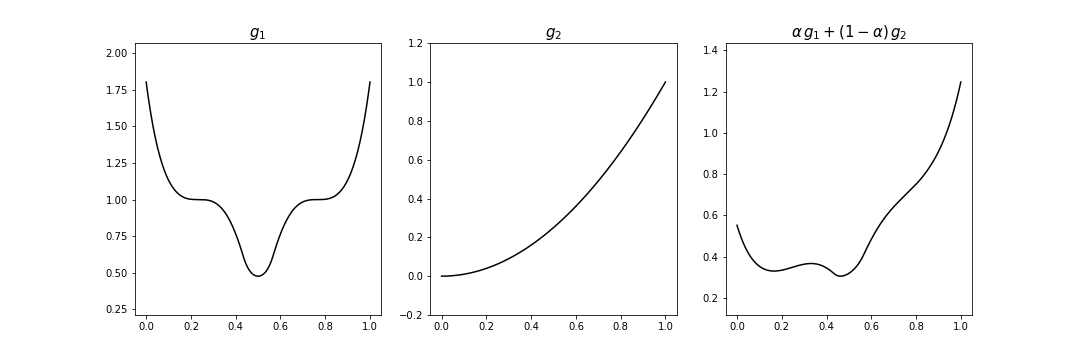
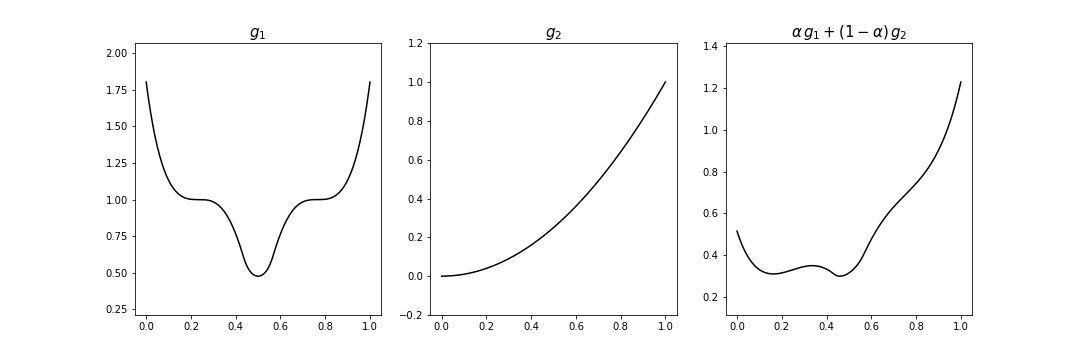
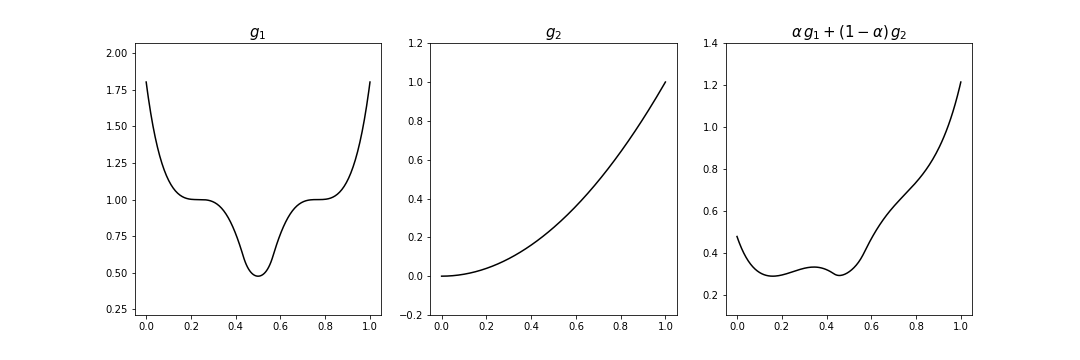
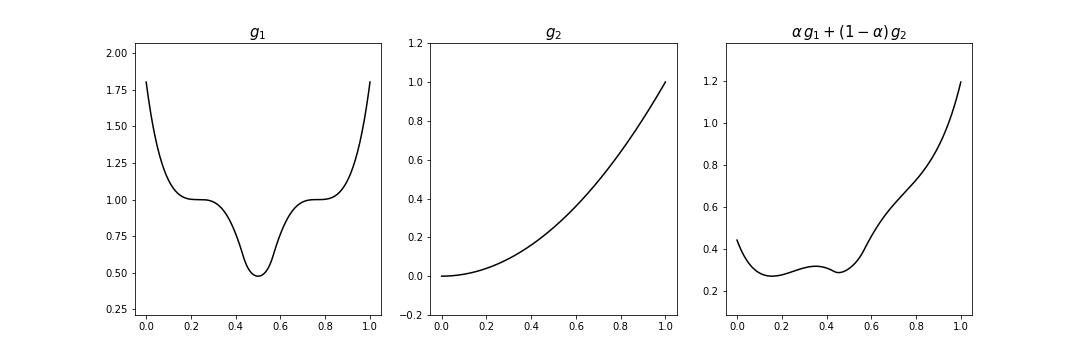
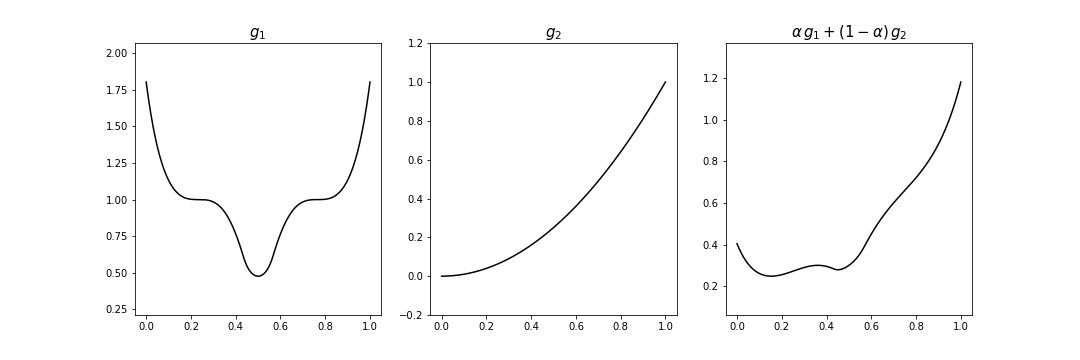
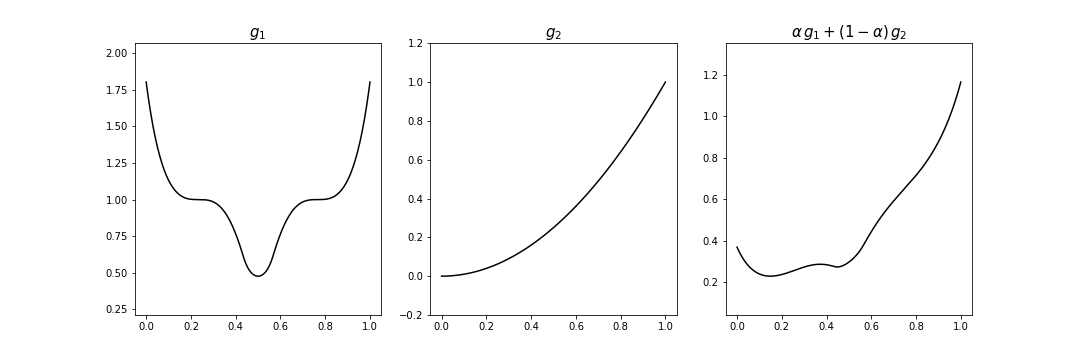
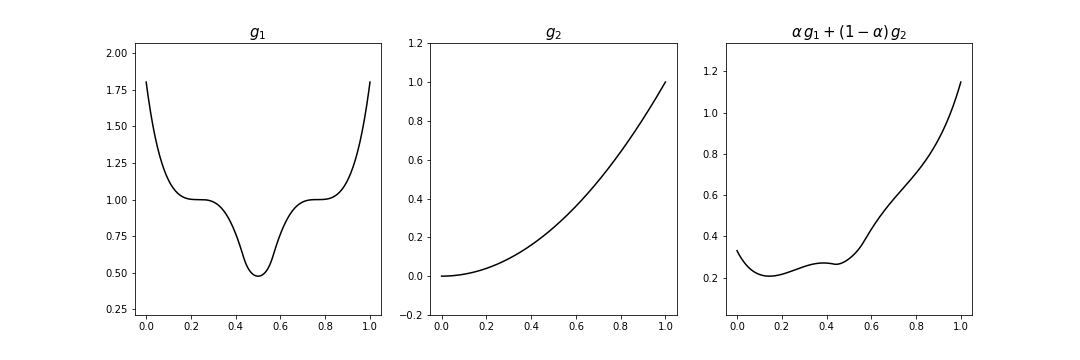
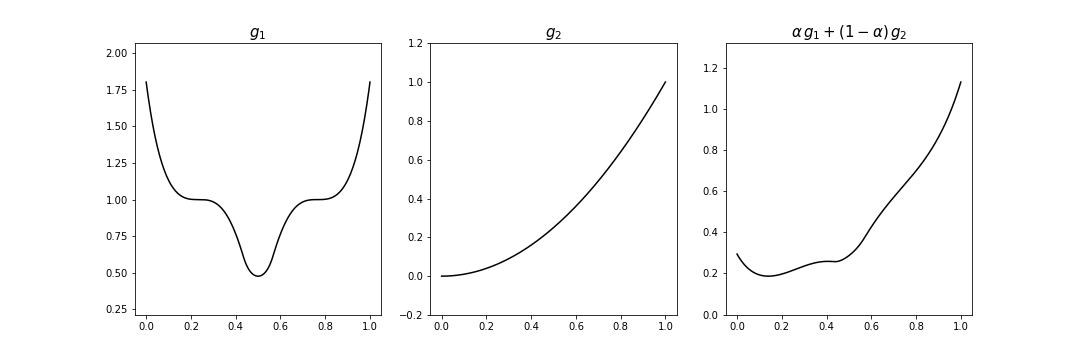
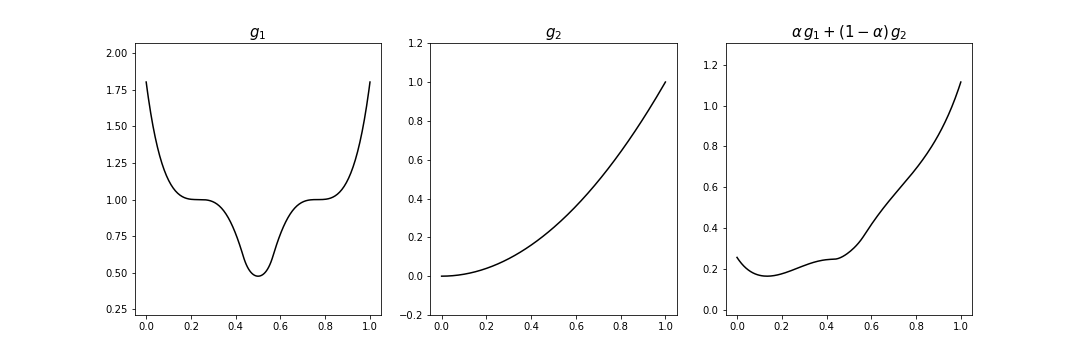
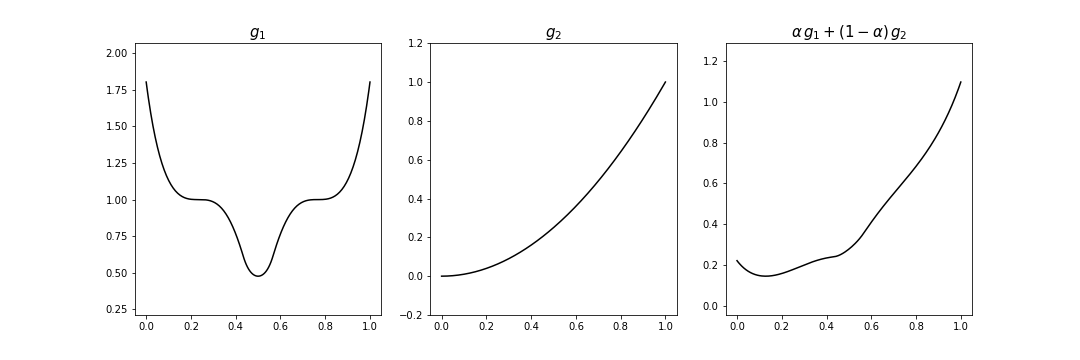
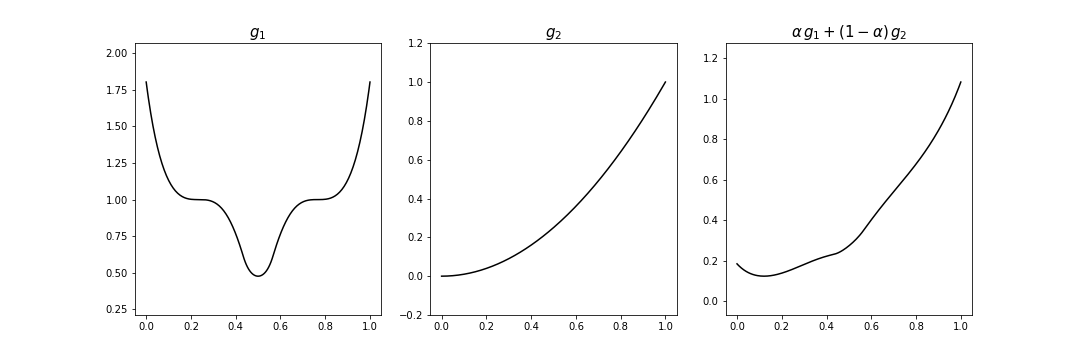
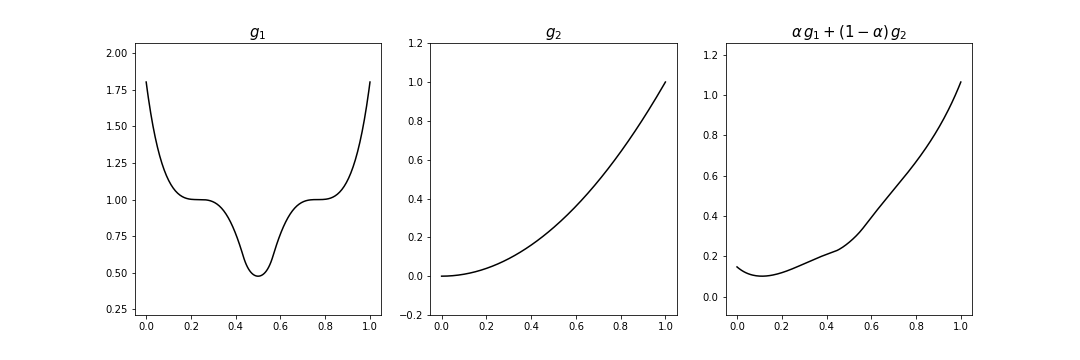
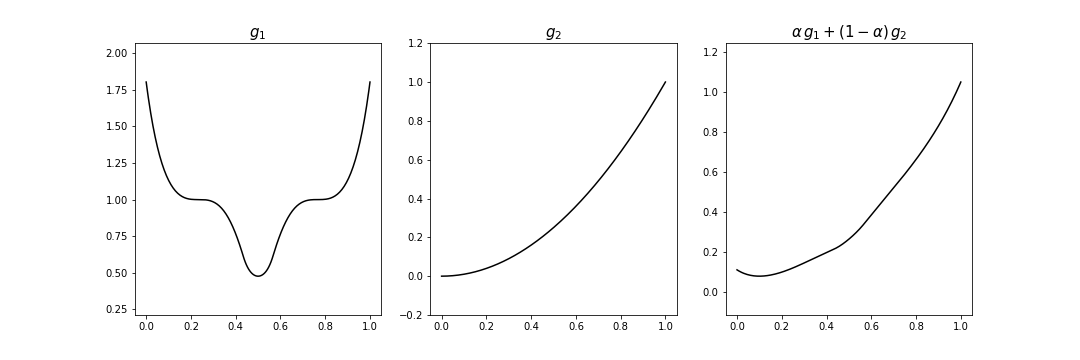
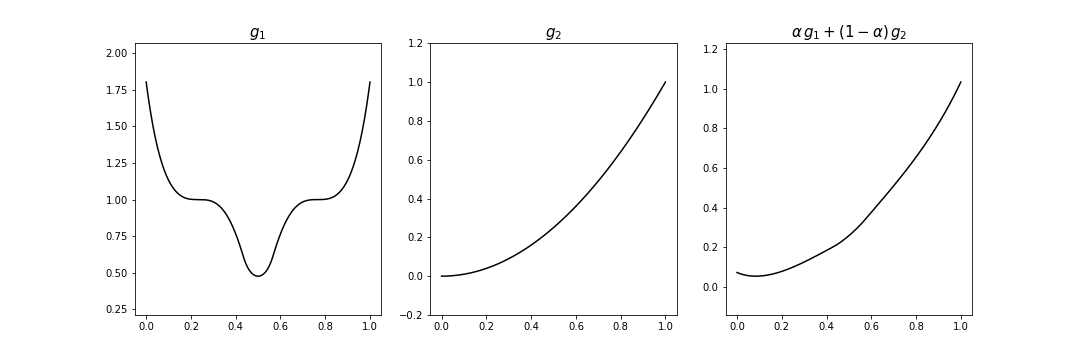
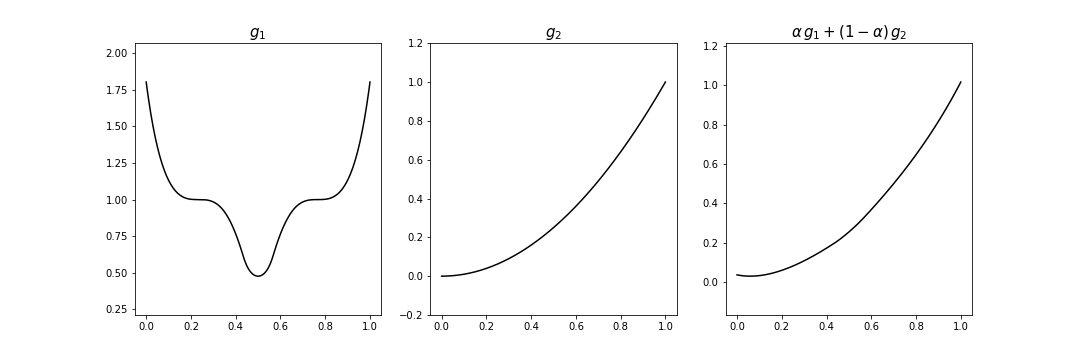
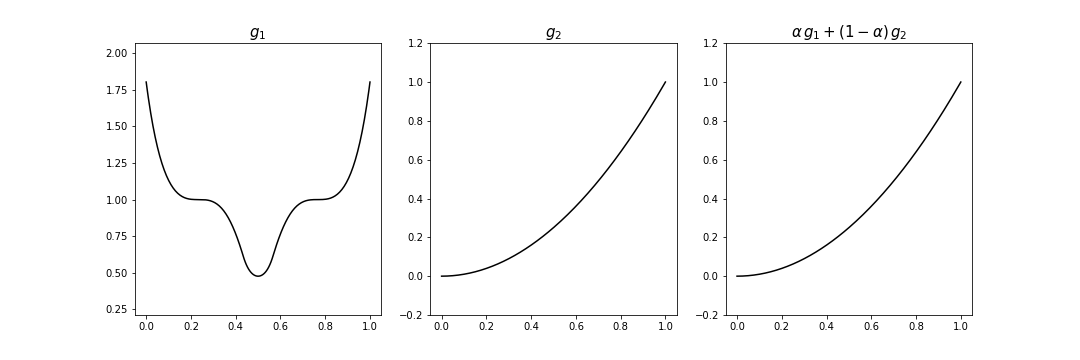

In [4]:
# what function should we play with?  Defined in the next line.
g1 = lambda w: np.maximum(0,(3*w - 2.3)**3 + 1)**2 + np.maximum(0, (-3*w + 0.7)**3 + 1)**2
g2 = lambda w: w**2

# create an instance of the visualizer with this function
test = math_functions_basics_library.convex_function_addition_2d.visualizer()

# plot away
test.draw_it(g1 = g1,g2 = g2,num_slides = 50,min_range = 0,max_range = 1)

# simple neural network example

In [11]:
# import custom JS animator
import sys
sys.path.append('demo_python_backend_files/')
from JSAnimation_slider_only import IPython_display

# import standard plotting and animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# import autograd functionality
from autograd import grad as compute_grad   # The only autograd function you may ever need
import autograd.numpy as np
from autograd import grad as compute_gradient
from autograd import hessian
import math

class visualizer:
    '''
    Convexifying a 3d non-convex surface with many saddle points.
    ''' 
    def __init__(self):
        # load in the bacterial dataset into self.x, self.y variables
        self.load_data()

        # compute gradient function of cost
        self.grad = compute_gradient(self.cost_function)
        
        # global regularization parameter
        self.lam = 0
        
    # load in data
    def load_data(self):
        # load data
        data = np.matrix(np.genfromtxt('bacteria_data.csv', delimiter=','))
        self.x = np.asarray(data[:,0])
        self.y = np.asarray(data[:,1])
        
        
    ###### ML Algorithm functions ######
    # sigmoid function
    def sigmoid(self,val):
        t = 1/(1 + np.exp(-val))
        return t
    
    # our model
    def evaluate_model(self,w,x):
        model = self.sigmoid(w[0] + w[1]*x)
        return model

    # compute cost function value for given input weights
    def cost_function(self,w):
        cost = 0
        for p in range(len(self.y)):
            # get current datapoint
            x_p = self.x[p]
            y_p = self.y[p]

            # write out linear combination of data
            val = w[0] + w[1]*x_p

            # take nonlinearity - sigmoid - of input combination, compute
            # least squares against term against corresponding output, add 
            # weighted regularizer, and add result to running total of the cost function
            cost += (self.sigmoid(val) - y_p)**2 + self.lam*(w[0]**2 + w[1]**2)
        return cost

    # run gradient descent
    def gradient_descent(self,w,alpha,max_its):
        # initiate container for weight history, store initial value
        w_hist = [w]
        
        # start gradient descent loop - with max_its stopping condition
        for k in range(max_its):
            # take gradient descent step
            w = w - alpha*self.grad(w)
            
            # store new weights in history
            w_hist.append(w)
            
        return w_hist

    # run the whole sha-bang
    def run_example(self,w_init_1,w_init_2,**args):
        w_init_1 = np.asarray([float(v) for v in w_init_1])
        w_init_2 = np.asarray([float(v) for v in w_init_2])
        
        # choose a range of lambdas to visualize
        lam_range = np.linspace(0,10**-2,10)
        if 'lam_range' in args:
            lam_range = args['lam_range']
            
        # choose a step length and max iterations for runs of gradient descent
        alpha = 10**-2
        if 'alpha' in args:
            alpha = args['alpha']
        
        max_its = 2000
        if 'max_its' in args:
            max_its = args['max_its']
            
        # initiate figure
        fig = plt.figure(figsize = (12,5))
        artist = fig
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122, projection='3d')
            
        # main animation function
        def animate(k):
            # clear current plots for next frame of animation
            ax1.cla()
            ax2.cla()
            
            # choose current regularization parameter
            self.lam = lam_range[k]
            
            # run gradient descent with two user-chosen initial values and chosen regularization value
            w_hist_1 = self.gradient_descent(w = w_init_1, alpha = alpha, max_its = max_its)
            w_hist_2 = self.gradient_descent(w = w_init_2, alpha = alpha, max_its = max_its)
            
            # plot data points in panel 1, and cost function in panel 2
            self.show_data_and_fit(ax1,w_hist_1[-1],color = 'lime')
            self.show_data_and_fit(ax1,w_hist_2[-1],color = 'magenta')

            # plot logistic surface, as well as gradient descent paths, in panel 2
            self.plot_logistic_surface(ax2)
            self.show_descent_path(ax2,w_hist_1,color = 'lime')
            self.show_descent_path(ax2,w_hist_2,color = 'magenta')

            return artist,

        anim = animation.FuncAnimation(fig, animate ,frames=len(lam_range), interval=len(lam_range), blit=True)
        
        return(anim)
    
    ####### plotting functions #######
    # show data and cost function fit to the data in panel 1
    def show_data_and_fit(self,ax,w,color):
        # plot data
        ax.scatter(self.x,self.y,s = 40, color = 'k',edgecolor = 'w',linewidth = 1)
                
        # show fit to data
        s = np.linspace(self.x.min(),self.x.max(),100)
        t = self.evaluate_model(w,s)
        ax.plot(s,t,color = color)
        
        # clean up plot
        ax.set_xlabel('$x$',fontsize=20,labelpad = 20)
        ax.set_ylabel('$y$',fontsize=20,rotation = 0,labelpad = 20)
        ax.set_xlim(min(self.x[:,0])-0.5, max(self.x[:,0])+0.5)
        ax.set_ylim(min(self.y)-0.1,max(self.y)+0.1)
        
    # make 3d surface plot
    def plot_logistic_surface(self,ax):
        # make a meshgrid of weights for the 3d surface
        r = np.linspace(-3,3,100)
        s,t = np.meshgrid(r, r)
        s = np.reshape(s,(np.size(s),1))
        t = np.reshape(t,(np.size(t),1))
        weights = np.concatenate((s,t),1)

        # build 3d surface - weight by weight
        cost_surface = []
        for i in range(len(weights)):
            w = weights[i]
            cost_surface.append(self.cost_function(w))
        cost_surface = np.asarray(cost_surface)
        
        # reshape everything for plotting
        s.shape = (len(r),len(r))
        t.shape =  (len(r),len(r))
        cost_surface.shape = (len(r),len(r))

        # plot 3d surface
        ax.plot_surface(s,t,cost_surface,cmap = 'jet',rstride=15, cstride=15,linewidth=1,edgecolor = 'k')
        
        # clean up plot and set viewing angle
        ax.xaxis.set_rotate_label(False)
        ax.yaxis.set_rotate_label(False)
        ax.zaxis.set_rotate_label(False)
        ax.get_xaxis().set_ticks([-3,-1,1,3])
        ax.get_yaxis().set_ticks([-3,-1,1,3])
        ax.set_xlabel('$w_0$   ',fontsize=20,rotation = 0,linespacing = 10)
        ax.set_ylabel('$w_1$',fontsize=20,rotation = 0,labelpad = 50)
        ax.set_zlabel('   $g(\mathbf{w})$',fontsize=20,rotation = 0,labelpad = 20)
        ax.azim = 175
        ax.elev = 20
        
    # show descent paths on the cost surface in panel 2
    def show_descent_path(self,ax,w_hist,color):
        # compute cost path using input weight history
        cost_path = []
        for i in range(len(w_hist)):
            w = w_hist[i]
            cost = self.cost_function(w)
            cost += 10**-3                          # add a little to the height of the cost path so its visible on top of the surface plot
            cost_path.append(cost)
        
        # plot grad descent path onto surface
        w0 = [v[0] for v in w_hist]
        w1 = [v[1] for v in w_hist]
        cost_path = [v[0] for v in cost_path]
        ax.plot(w0,w1,cost_path,color = color,linewidth = 5)  


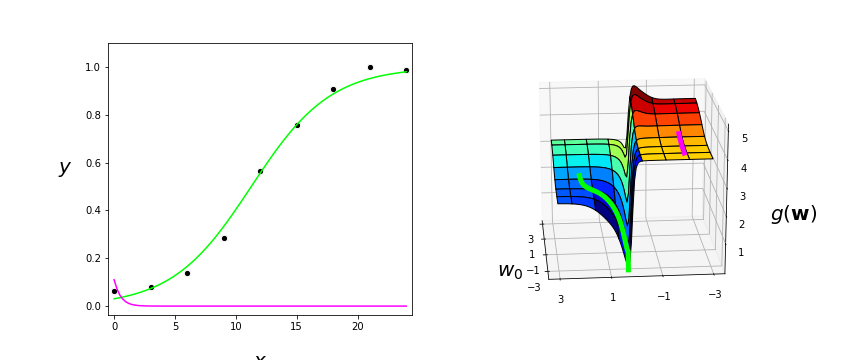
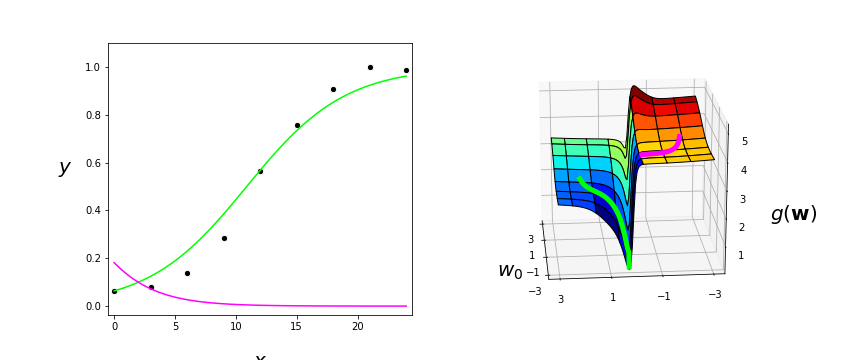
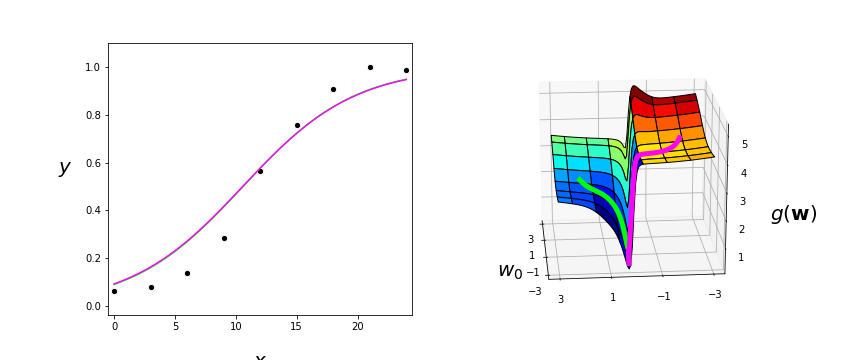
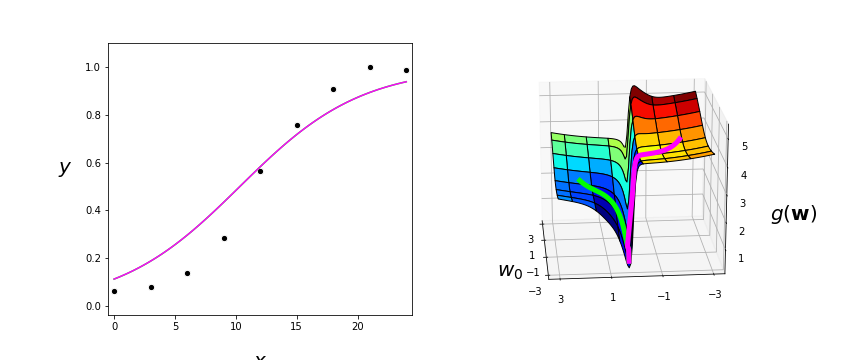
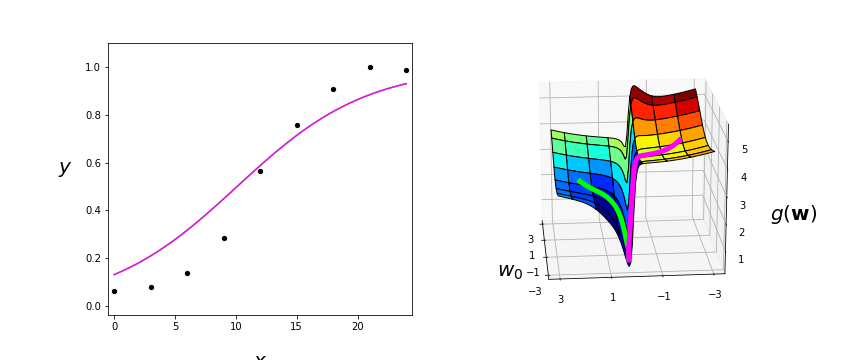
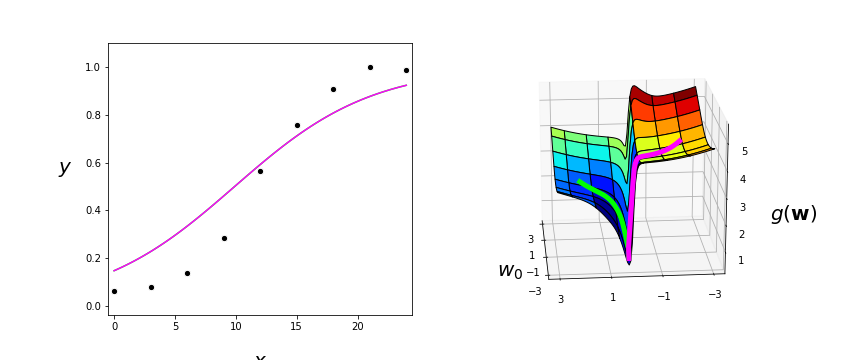
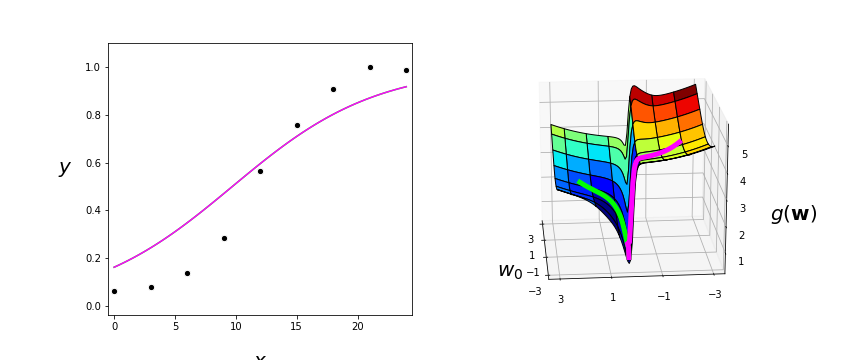
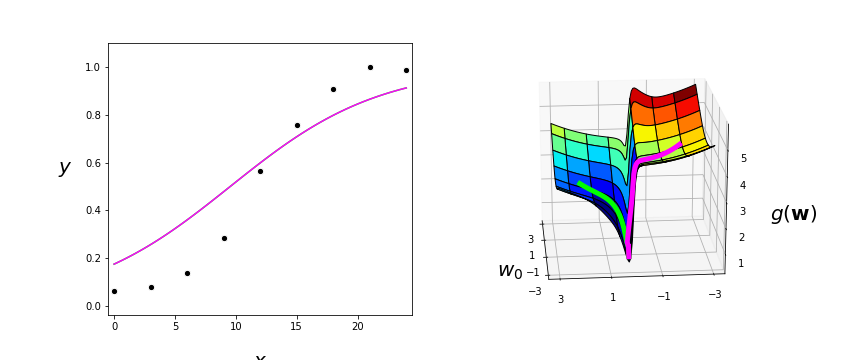
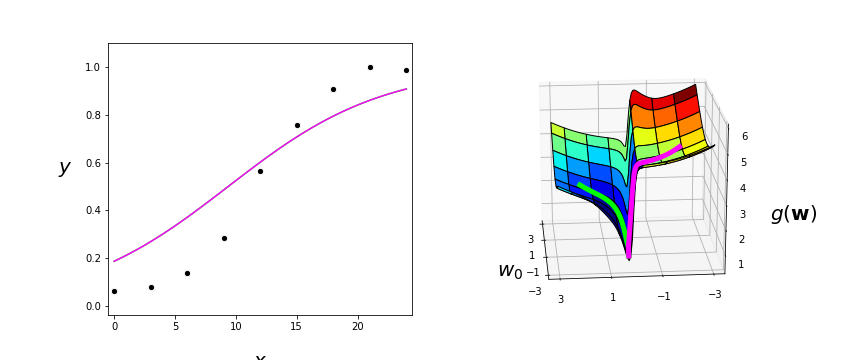
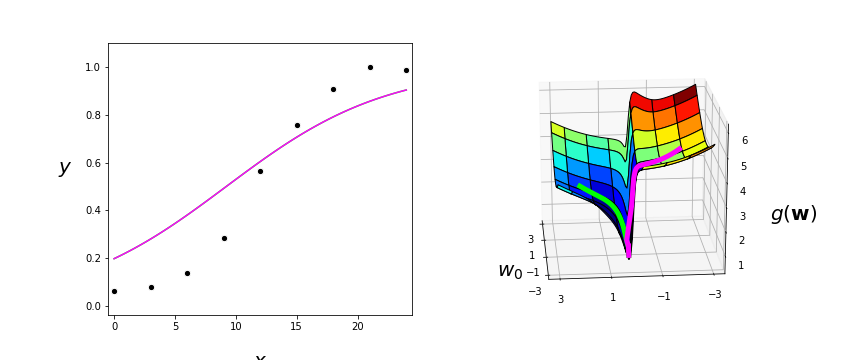

In [12]:
test = visualizer()

w_init_1 = [0,2]
w_init_2 = [0,-2]
lam_range = 0
max_its = 5000
test.run_example(w_init_1 = w_init_1, w_init_2 = w_init_2,max_its = max_its)